# Multiple Linear Regression Bike-Sharing Assignment


## Table of Content

### 1. Introduction
#### 1.1 Problem Statement
#### 1.2 Business Understanding
#### 1.3 Business Objectives
#### 1.4 Data Description
#### 1.5 Features Description
#### 1.6 Objective of the Assignment
 
### 2. Fetching Data
#### 2.1 Import packages
#### 2.2 Import data

### 3. Initial Data understanding

### 4. Data Cleaning

### 5. EDA
#### 5.1 Summary statistics for numeric attribute
#### 5.2  Univariate Analysis
#### 5.2.2 Univariate Analysis for Categorical Variables 
##### barplot,count plot, pie plot
#### 5.2.1 Univariate Analysis for Continuous Variables
##### distribution plots,count plot 
#### 5.3 Visualization of Continuous Variables
##### Scatter plot, heatmap
#### 5.4 Visualization of Categorical Variables
##### box plot
#### 5.5 Conclusion

### 6. Data Preparation
#### 6.1. Create Dummy variables for all the categorical variables
#### 6.2. Divide the data into training and testing data
#### 6.3. Perform Scaling 
#### 6.4. Divide data into dependent and indipendent variables

### 7. Model Building
#### 7.1 Model 1: Included all the independent variables  
#### 7.2 Building Models using both 'RFE' method for automation of feature elimination and 'statsmodel' for the detailed statistics
#### 7.2.1 Model 2: (Build the model by considering top 15 features)
##### Model 2.1, Model 2.2, Model 2.3
#### 7.2.2 Model 3 : (Build the model by considering top 10 features)
#### 7.2.3 Model 4: (Build a model by removing the mnth_Nov from Model3)

### 8. Residual Analysis
#### 8.1 Check R-square value
#### 8.2 Error terms Normality check
#### 8.3 Looking for patterns in the residuals

### 9. Prediction on the test dataset and Model Evaluation
#### 9.1 Scale the test dataset first
#### 9.2 Prediction with Model5 (Top 7 variables)
#### 9.3 Model 5 Evaluation
#### 9.4 Prediction with Model4 (Top 9 variables)
#### 9.5 Model 4 Evaluation


### 10. Conclusion 

# Multiple Linear Regression  Bike-Sharing Assignment

# 1. Introduction

## 1.1 Problem Statement

A US bike-sharing provider BoomBikes aspires to understand the demand for shared bikes among the people after the ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits. 
 
 The company wants to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. 
 
 The company wants to know:
 * Which variables are significant in predicting the demand for shared bikes.
 * How well those variables describe the bike demands


## 1.2 Business Understanding

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


## 1.3 Business Objectives:

We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## 1.4 Data Description

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

## 1.5 Feature Description

	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : wether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered


## 1.6 Objective of the Assignment

* Build a Multiple Linear Regression model to predict the future demand for shared bikes.
* Evaluate the model by statistical metrics
* Find the independent variables which are significant in predicting the demand for shared bikes.

# 2. Fetching Data¶

## 2.1 Importing required Libraries

In [570]:
# Load the necessary libraries

import numpy as np   # For any mathematical computation
import pandas as pd  # for handling the data
import seaborn as sns  # for plotting the graphs
import matplotlib.pyplot as plt  # For plotting the basic graphs
from sklearn.model_selection import train_test_split # For creating train and test dataset
# Import libraries for Standardization
from sklearn.preprocessing import StandardScaler
# import statsmodel libraries to build linear regression
import statsmodels.api as sm
# Import variance_inflation_factor to find VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Import sklearn feature selection RFE (Recursive Feature Elimination)
from sklearn.feature_selection import RFE
# Import sklearn linear_model LinearRegression
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

# r2_score for 7 variables
from sklearn.metrics import r2_score

import warnings    # to handle any deprecated issue warnings
warnings.filterwarnings(action="ignore")

## 2.2 Load the data

In [571]:
# Read the day.csv file
data = pd.read_csv('day.csv')

# 3. Initial Data Understanding

In [572]:
# Looking at first 5 rows to understand what kind of values are there in the data set
data.head(20)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [573]:
# Looking at last 5 rows to understand what kind of values are there in the data set
data.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [574]:
# List the column names of the data set
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [575]:
# Check the size of the data set
data.shape

(730, 16)

In [576]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Observation : 
 
 By looking at the data.info() it is clear that there is no missing values and data values are also looks good.

In [577]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [578]:
for i in data.columns:
    print(i+'\n')
    print(data[i].value_counts())

instant

730    1
251    1
249    1
248    1
247    1
      ..
485    1
484    1
483    1
482    1
1      1
Name: instant, Length: 730, dtype: int64
dteday

02-08-2019    1
03-12-2019    1
05-11-2019    1
21-10-2019    1
27-03-2019    1
             ..
26-10-2019    1
15-03-2018    1
17-09-2018    1
23-06-2018    1
12-04-2018    1
Name: dteday, Length: 730, dtype: int64
season

3    188
2    184
1    180
4    178
Name: season, dtype: int64
yr

1    365
0    365
Name: yr, dtype: int64
mnth

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64
holiday

0    709
1     21
Name: holiday, dtype: int64
weekday

6    105
1    105
0    105
5    104
4    104
2    104
3    103
Name: weekday, dtype: int64
workingday

1    499
0    231
Name: workingday, dtype: int64
weathersit

1    463
2    246
3     21
Name: weathersit, dtype: int64
temp

10.899153    5
26.035000    5
23.130847    4
28.563347    4
27.880000    4
     

In [579]:
data.shape

(730, 16)

In [580]:
# Calculate the % of holidays of the holiday column
round(100 * data[data["holiday"]==1].shape[0]/data.shape[0],2)

2.88

In [581]:
#Calculate the % of workingdays of the workingday column
round(100 * data[data["workingday"]==1].shape[0]/data.shape[0],2)

68.36

# Observation : 
   1. By looking at the value_counts of each variables it is clear that there is no invalid values. 
   2. But the values of the 'season' and 'weathersit' are in numeric for analysis we need to map them with associated string           labels.
   3. yr and mnth columns contains the year(0: 2018 and 1:2019) and month (1: Jan,2:Feb,3:Mar,4:Apr,....12:Dec)of the day. There       for no need to create any new derived variables of date.We can map the mnth columns to appropriate month labels.
   4. holiday column shows that only 2.88% holiday.
   5. workingday column shows that 68.36% working days, all other days are holiday or weekends

# 4. Data Cleaning

In [582]:
# Confirm there is no null value in dataset
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## Map the numeric value of season with associated string label

    season : season (1:spring, 2:summer, 3:fall, 4:winter)

In [583]:
# Map the integer values of the season variable to the associated string labels

data['season'] =  data['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})


In [584]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [585]:
# Check the value counts of season column
data.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

## Map the numeric value of weathersit with associated string label
    weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [586]:
# Change the numerical values of weathersit to associated string label
data['weathersit'] = data['weathersit'].map({1:'clear',2:'mist',3:'light_snow',4:'heavy_rain'})

In [587]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [588]:
# Check the frequency of season with weathersit
data.groupby(['season','weathersit']).instant.count()

season  weathersit
fall    clear         136
        light_snow      4
        mist           48
spring  clear         111
        light_snow      4
        mist           65
summer  clear         113
        light_snow      3
        mist           68
winter  clear         103
        light_snow     10
        mist           65
Name: instant, dtype: int64

## Observation: 
    By observing the season and weathersit variables, in all the season most of the days the weather is clear

In [589]:
# Check the value count of mnth
data['mnth'].value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [590]:
# Change the numerical value of 'mnth' column to associated string label
data['mnth'] = data['mnth'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [591]:
data.head(20)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,6,0,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,0,0,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,spring,0,Jan,0,4,1,clear,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,spring,0,Jan,0,5,1,mist,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,spring,0,Jan,0,6,0,mist,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,spring,0,Jan,0,0,0,clear,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,spring,0,Jan,0,1,1,clear,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [592]:
# Change the type of dteday variable elements to datetime64
########data['dteday'] = pd.to_datetime(data['dteday'],format='%d-%m-%Y')
from datetime import datetime
data['dteday'] = data['dteday'].apply(lambda x: datetime.strptime(x, '%d-%m-%Y'))

In [593]:
# extracting weekday from dteday

data['weekday'] = data['dteday'].apply(lambda x : x.day_name())

In [594]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,Jan,0,Monday,0,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,spring,0,Jan,0,Tuesday,0,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,spring,0,Jan,0,Wednesday,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,spring,0,Jan,0,Thursday,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,spring,0,Jan,0,Friday,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


**Observation :
 1.  workingday variable looks doubtful. In workingday Monday and Tuesday its showing weekend.


**Decision taken:** 

    Update workingday variable :

 1. We will  change the workingday variable according to holiday and weekday data values.
 2. If holiday == 1 or weekday == 'Sunday' or weekday == 'Saturday' then the workingday =0 otherwise workingday = 1

In [595]:
# Update new values to workingday variable
cond1 = data['holiday'] == 1
cond2 = data['weekday'] == 'Saturday' 
cond3 = data['weekday'] == 'Sunday'

data['workingday'] =pd.Series(np.where(cond1 | cond2 | cond3,0,1))

In [596]:
data['workingday'].value_counts()

1    504
0    226
Name: workingday, dtype: int64

In [597]:
data.groupby('workingday').cnt.median()

workingday
0    4572.0
1    4544.5
Name: cnt, dtype: float64

In [598]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    int32         
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

    Observation:
        1. Our target variable is 'cnt'  cnt is nothing but (casual + registered)
        2. temp and atemp are the temperature in celcius and feeling temperature in celcius respectively

# 5. EDA

## 5.1 Summary Statistics

In [599]:
# Check the summary statistics of the dataset
data.describe()

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,0.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,0.500343,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [600]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [601]:
# Create Categorical variables and Continuous variables
cat_var = ['season','weathersit','yr','mnth','holiday','weekday','workingday'] # Categorical variables
cont_var = ['temp','atemp','hum','windspeed','casual','registered','cnt'] # Continuous Variables

## 5.2 Univariate Analysis


   1. The variable 'casual' indicates the number casual users who have made a rental. 
   2. The variable 'registered' on the other hand  shows the total number of registered users who have made a booking on a given       day.   
   3. The 'cnt' variable indicates the total number of bike rentals, including both casual and registered variable.
   
   #### We need to build the model by taking this 'cnt' as the target variable.

 The season and weather are very important features. Peoples usually go out if the weather is clear generally. So my assumption  is if the weather is clear the demand for the shared bike will increase. Let us check it with our analysis.

### 5.2.1 Univariate Analysis of categorical variables

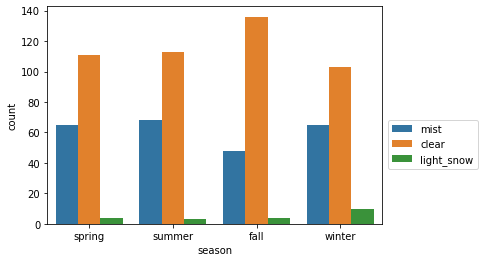

In [602]:
# Check the variations of weather in each season
sns.countplot(data=data , x='season',hue='weathersit')
plt.legend(bbox_to_anchor =(1.30,0.5))

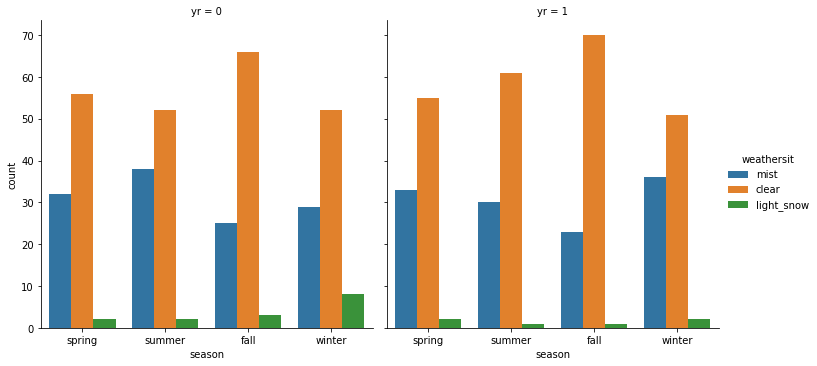

In [603]:
# Check the variations of weather in each season for both years 2018 and 2019 
# yr : year (0: 2018, 1:2019)
sns.catplot(data=data , x='season',hue='weathersit',col = 'yr',kind='count')


<AxesSubplot:ylabel='cnt'>

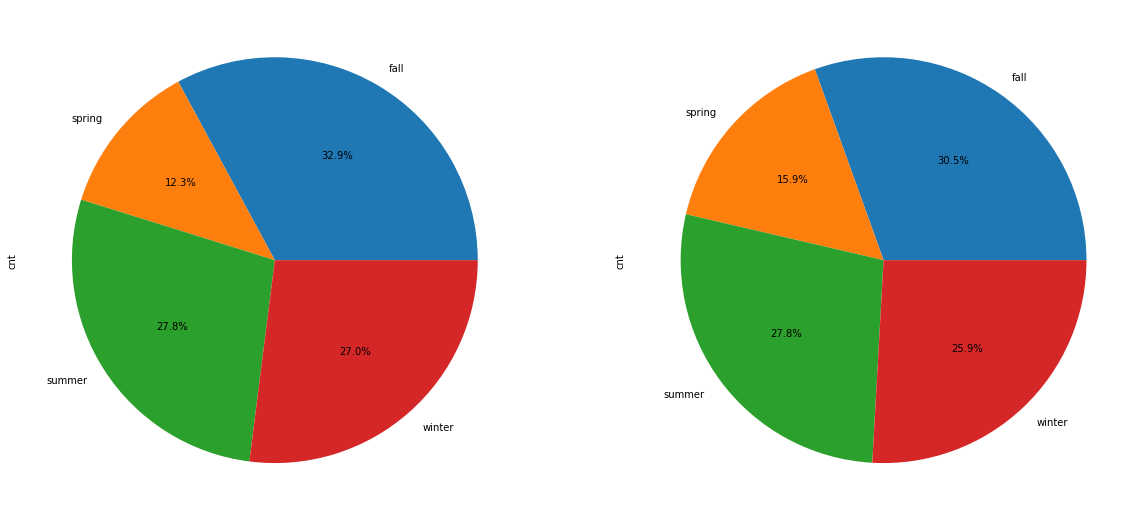

In [604]:
## Check  how season affects the demand for shared bikes
# yr : year (0: 2018, 1:2019)

plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
data_2018 = data[data['yr'] == 0]
data_2018.groupby(['season']).cnt.mean().plot.pie(autopct='%1.1f%%')

plt.subplot(1,2,2)
data_2019 = data[data['yr'] == 1]
data_2019.groupby(['season']).cnt.mean().plot.pie(autopct='%1.1f%%')

<AxesSubplot:ylabel='cnt'>

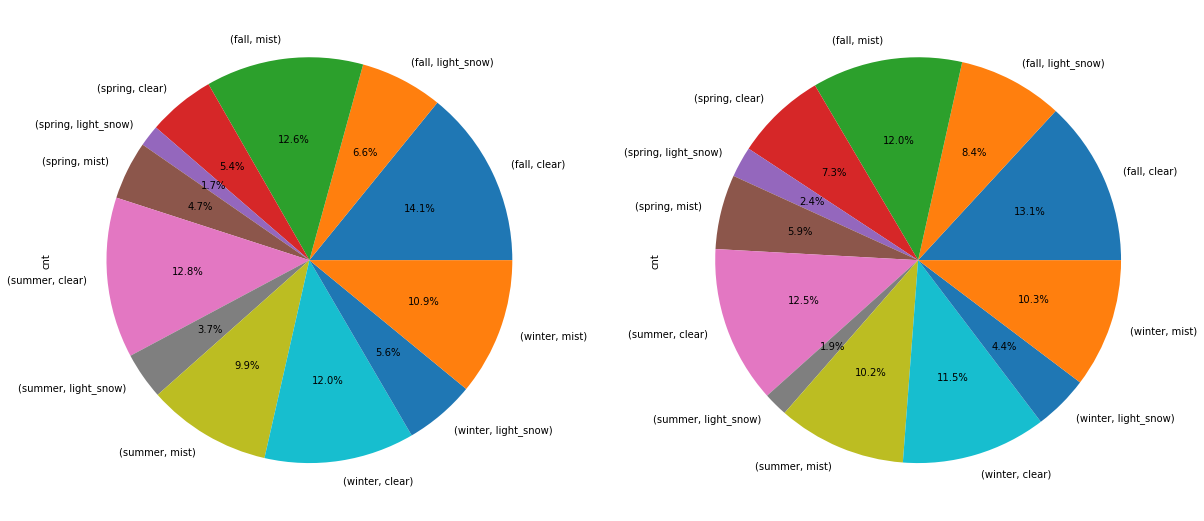

In [605]:
## Check the variations of weather in each season how it affects the demand for shared bikes
# yr : year (0: 2018, 1:2019)

plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
data_2018 = data[data['yr'] == 0]
data_2018.groupby(['season','weathersit']).cnt.mean().plot.pie(autopct='%1.1f%%')

plt.subplot(1,2,2)
data_2019 = data[data['yr'] == 1]
data_2019.groupby(['season','weathersit']).cnt.mean().plot.pie(autopct='%1.1f%%')

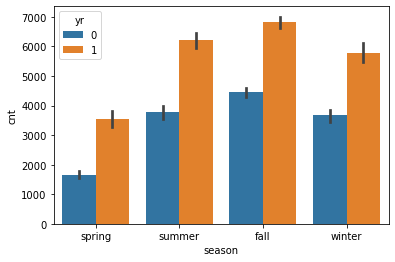

In [606]:
# Compare the demand for shared Bikes in the year 2018(0) and 2019(1) fro each season
sns.barplot(data =data,x='season',y= 'cnt',hue='yr')
plt.show()

Observation:
  1. The demand for shared bikes is increased from 2018 to 2019
  2. Demand for shared bikes is more in falls season compare to all other season
  3. In Spring season the demand is least and in fall season the demand for shared bikes is highest.

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

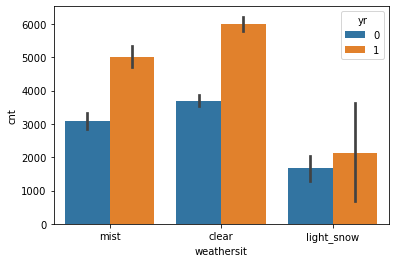

In [607]:
# Check how the weather affects the demand for shared bikes
sns.barplot(data =data,x='weathersit',y='cnt',hue='yr')

# Observation : 
   1. The demand for shared bikes more depends on weather, if the weather is clear then the demand for shared bikes is more and       if there is a snow fall the demand for shared bikes reduces.
   2. Demand for shared bikes is increased in 2019 compare to 2018
  

# Insight :

    1. If the lockdown is over and conditions becomes normal gradually the demand for shared bikes will increase.We have do proper advertising,promotions and give proper offers.
    2. The demand for shared bikes depends upon the season and weathersit. Therefore, season and weathersit are important driving factors.

In [608]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,Jan,0,Monday,1,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,spring,0,Jan,0,Tuesday,1,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,spring,0,Jan,0,Wednesday,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,spring,0,Jan,0,Thursday,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,spring,0,Jan,0,Friday,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [609]:
data.groupby('workingday').cnt.median() # Check the workingday variable considering target variable

workingday
0    4572.0
1    4544.5
Name: cnt, dtype: float64

In [610]:
data.groupby('holiday').cnt.median() # Check the holiday variable considering target variable

holiday
0    4563
1    3351
Name: cnt, dtype: int64

In [611]:
data.groupby('weekday').cnt.median() # Check the weekday variable considering target variable

weekday
Friday       4642.5
Monday       4511.0
Saturday     4572.0
Sunday       4590.5
Thursday     4676.0
Tuesday      4381.0
Wednesday    4350.0
Name: cnt, dtype: float64

**Observation:**

    1. The demand for shared bikes is almost same in all the days of the week.
    2. Tuesday and Wednesday demand of shared bikes is  little less.

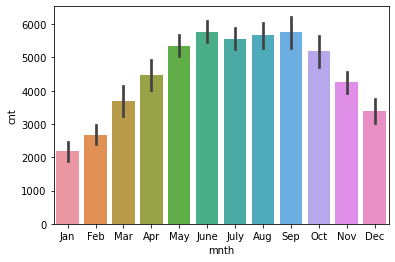

In [612]:
# Check the demand for shared bikes in each month
sns.barplot(data =data,x='mnth',y='cnt')
plt.show()

**Observation:**

 1. The demand for shared bikes is increases from jan to June. From Oct to Dec gradually reduces.

### 5.2.2 Univariate Analysis of Continuous variables

In [613]:
# Check the distribution of all the continuous variables
cont_var

['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

temp



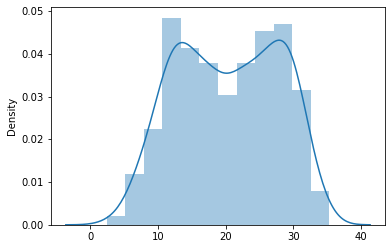

atemp



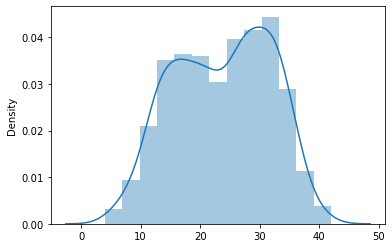

hum



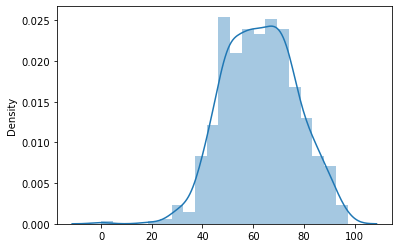

windspeed



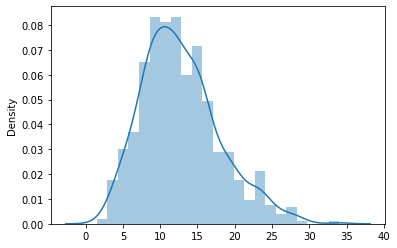

casual



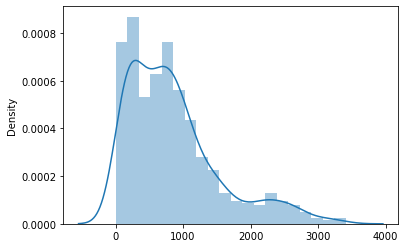

registered



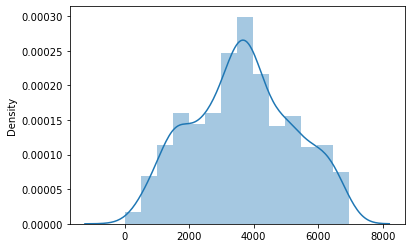

cnt



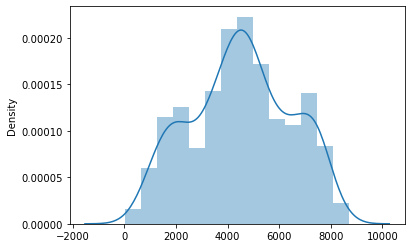

In [614]:
for i in cont_var:
    print (i + '\n')
    sns.distplot(x=data[i])
    plt.show()

**Observation:**

    All numerical variables are almost normally distributed

# 5.3 Visualising numeric variables

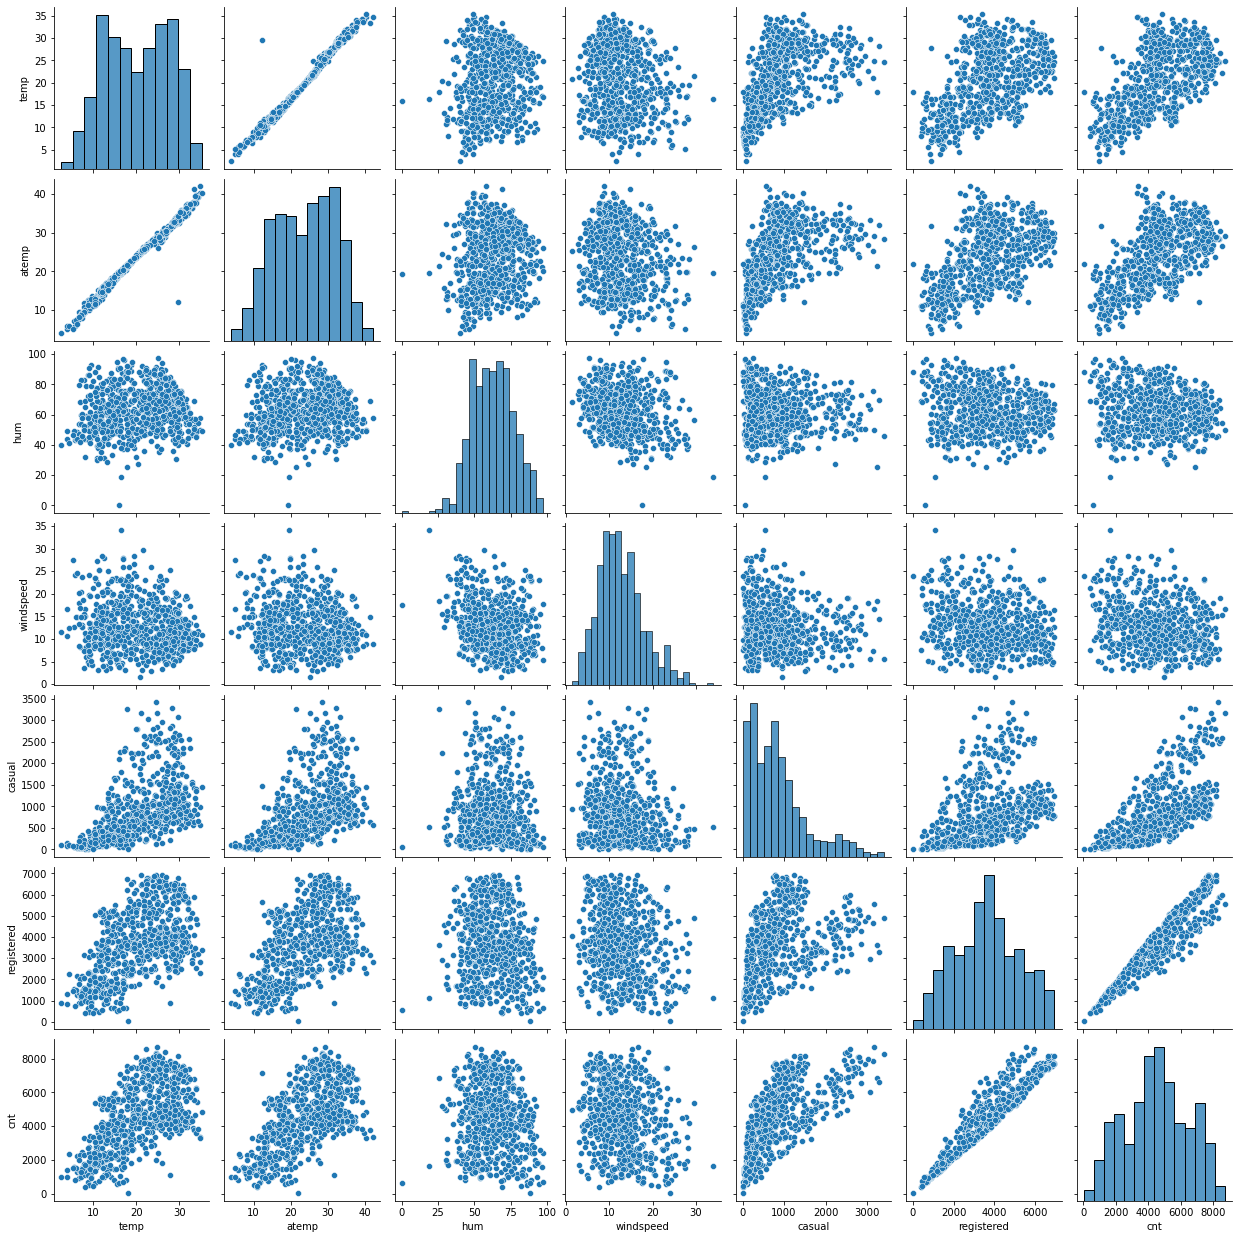

In [615]:
sns.pairplot(data[cont_var])
plt.show()

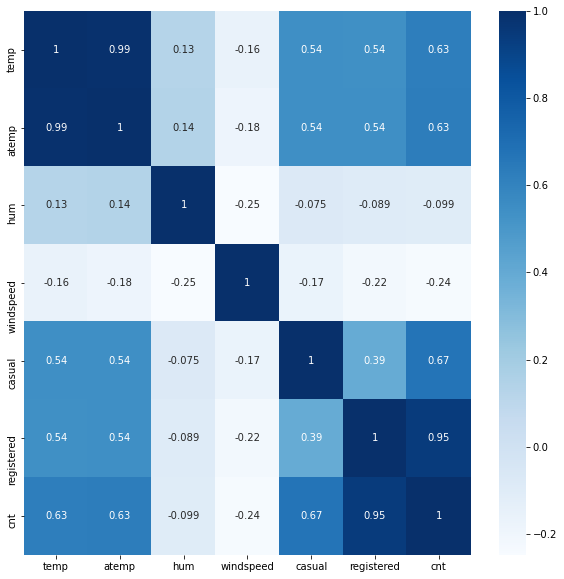

In [616]:
# plot a heatmap for all cont_var to check the correlation between them

plt.figure(figsize=(10,10))
sns.heatmap(data[cont_var].corr(),annot=True,cmap = 'Blues')
plt.show()

# Observation:

   1. temp and atemp variables are more correlated to each other. So we can drop any one variable. Let us drop atemp variable
   2. The temp variable and target varibale 'cnt' has linearity. Therefore using temp feature variable we can create linear regression model
   3. Our target variable is cnt. cnt is nothing but sum of casual and registerd. registered variable is higly correlated (95%) with cnt and casual variable is 67% correlated with cnt.
   4. We can concentrate on our target variable $'cnt'$.

In [617]:
cat_var

['season', 'weathersit', 'yr', 'mnth', 'holiday', 'weekday', 'workingday']

# 5.4 Visualising the Categorical variables

<AxesSubplot:xlabel='workingday', ylabel='cnt'>

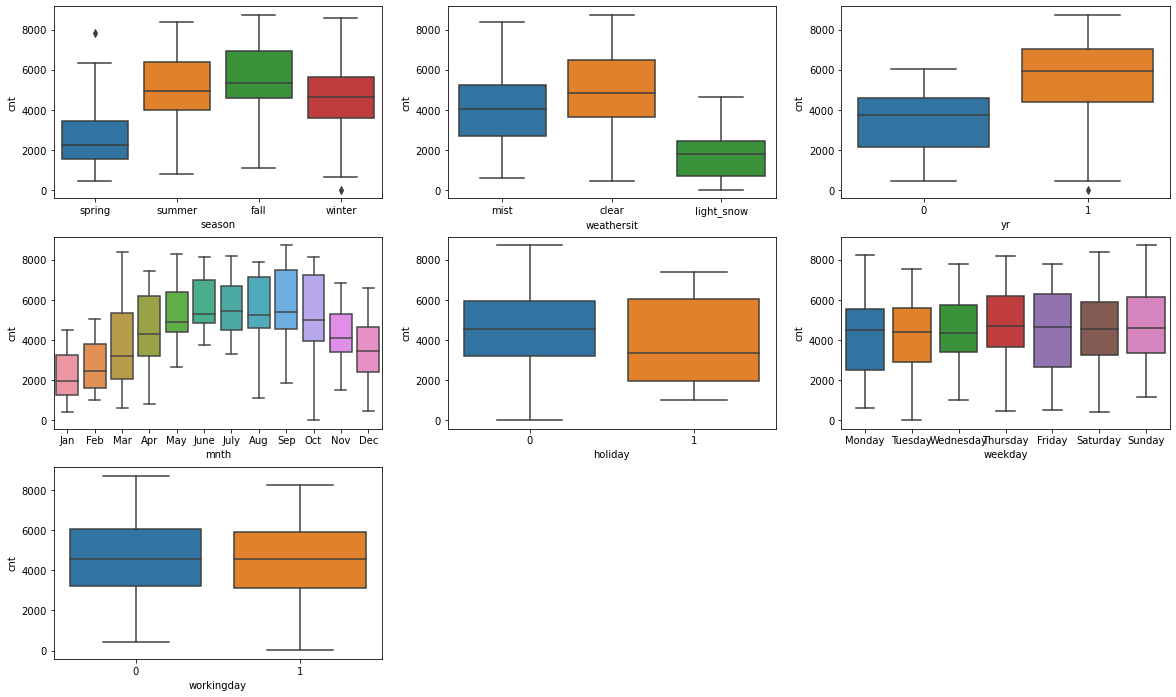

In [618]:
# Box plot for all the categorical variables
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = data)
plt.subplot(3,3,2)
sns.boxplot(x = 'weathersit', y = 'cnt', data = data)
plt.subplot(3,3,3)
sns.boxplot(x = 'yr', y = 'cnt', data = data)
plt.subplot(3,3,4)
sns.boxplot(x = 'mnth', y = 'cnt', data = data)
plt.subplot(3,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = data)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = data)
plt.subplot(3,3,7)
sns.boxplot(x = 'workingday', y = 'cnt', data = data)



In [619]:
data.groupby(['season','mnth']).cnt.median().sort_values() # Check the demand for shared bikes in each season and month

season  mnth
spring  Jan     1939.0
        Dec     1955.0
        Feb     2438.5
summer  Mar     3037.5
spring  Mar     3216.5
winter  Dec     3798.5
        Nov     4081.0
summer  Apr     4293.5
        May     4890.5
winter  Oct     5013.0
summer  June    5149.5
fall    Aug     5229.5
        Sep     5230.0
        July    5446.5
        June    5489.0
winter  Sep     6156.0
Name: cnt, dtype: float64

In [620]:
data.groupby(['season','mnth']).cnt.mean().sort_values() # Sorted cnt values

season  mnth
spring  Dec     1954.454545
        Jan     2176.338710
        Feb     2669.964286
        Mar     3551.625000
summer  Mar     3947.954545
winter  Dec     4200.950000
        Nov     4247.183333
summer  Apr     4484.900000
winter  Oct     5199.225806
summer  May     5349.774194
fall    July    5563.677419
        Aug     5664.419355
        Sep     5672.704545
        June    5769.400000
summer  June    5773.850000
winter  Sep     6024.500000
Name: cnt, dtype: float64

# Observation:

   1. In fall season the  demand for shared bikes are more and in spring season shows least demand for shared bikes.
   2. The spring season is from December to March, the demand for shared bike is very less in this season.
   3. September month has highest demand for shared bikes.
   4. January month has least demand for shared bikes.

 # Insight:
 
 1. As we predicted before the demand for shared bikes are more when the weather is clear and there is least demand when there is snow fall.
 2. In holiday the demand for shared bike is reduces.
 3. December and January is the beginning of Spring and still winter effect will be there, snow fall will be there. Therefore the demand for shared bikes is less. From Feb onwards again it pickups.
 

In [621]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

## Drop some variables which we don't need for our modelling

We are going to drop instant,dteday,atemp,casual and registered
Reason:
 1. $instant$ : It contains index numbers as elements.
 2. $dteday$ : It contains the dates. We have yr ,mnth and weekday infromation 
 3. $atemp$ : It is highly correlated with temp
 4. $casual$ and $registered$ : cnt is the sum of casual and registered variables. Our target variable is cnt. 
    
So we can drop all the above variables from our dataset.

In [622]:
data = data.drop(['instant','dteday','atemp','casual','registered'],axis = 1)

# 5.5 Conclusion:

 Independent variables:

  1. Important categorical variables season, weathersit, mnth,weekday (We need to create dummy variables to these variables
  2. Important categorical binary variables yr,holiday,workingday
  3. Imortant continuous variables temp, hum, windspeed

  Dependent variables:
    
    1. Target variable is 'cnt' 

In [623]:
cat_dummy_var = ['season','weathersit','mnth','weekday'] # Categorical dummy variables
cat_bin_var = ['yr','holiday','workingday'] # Categorical binary variables (Which has only 2 values 0 and 1)
con_var = ['temp','hum','windspeed'] # Continuous variables

# 6. Data Preparation:

## 6.1. Create Dummy variables for all the categorical variables

    Create dummy variables for categorical variables season,weathersit,mnth and weekday 

In [624]:
# Extract categorical dataset to create dummy variable data set
categorical_data = data[['season','weathersit','mnth','weekday']] 

In [625]:
# Convert into dummies
data_dummies = pd.get_dummies(categorical_data, drop_first=True)
data_dummies.head()

,season_spring,season_summer,season_winter,weathersit_light_snow,weathersit_mist,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [626]:
# Drop categorical variable columns
data = data.drop(list(categorical_data.columns), axis=1)

In [627]:
# Concatenate dummy variables with the original dataframe
data = pd.concat([data, data_dummies], axis=1)

In [628]:
# Let's check the first few rows
data.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [629]:
data.shape

(730, 29)

## 6.2. Divide the data into training and testing data

In [630]:
# Split the dataframe into train and test sets
from sklearn.model_selection import train_test_split
np.random.seed(0)
data_train, data_test = train_test_split(data, train_size=0.7, test_size=0.3, random_state=100)

In [631]:
data_train

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
653,1,0,1,19.201653,55.8333,12.208807,7534,0,0,1,...,0,0,1,0,0,0,0,0,0,1
576,1,0,1,29.246653,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,0,0,0,0,0,1
426,1,0,0,16.980847,62.1250,10.792293,4066,1,0,0,...,0,0,0,0,0,0,1,0,0,0
728,1,0,1,10.489153,48.3333,23.500518,1796,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,4220,0,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,29.554153,58.7917,13.916771,6664,0,1,0,...,0,0,0,0,0,0,0,0,1,0
578,1,0,1,30.852500,65.9583,8.666718,7261,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53,0,0,1,9.091299,42.3043,6.305571,1917,1,0,0,...,0,0,0,0,0,0,0,0,0,0
350,0,0,1,10.591653,56.0833,16.292189,2739,0,0,1,...,0,0,0,0,1,0,0,0,0,0


## 3. Perform Scaling 

We need to scale the variables for better interpretability and to converge fast to the solution. But we only need to scale the numeric columns (Continuous variables) and not the dummy variables and binary categorical variables.

In [632]:
# Check the continuous independent variables
con_var
    

['temp', 'hum', 'windspeed']

In [633]:
con_var = con_var + ['cnt']

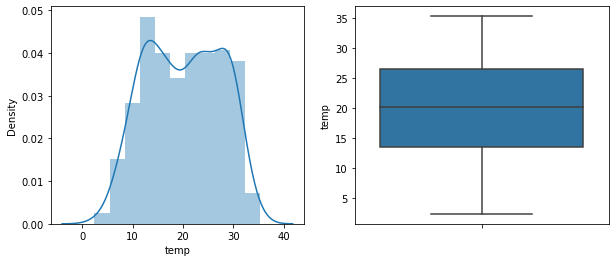

In [634]:
# Box plot and distplot for temp variable of training dataset
plt.figure(figsize =(10,4))
plt.subplot(1,2,1)
sns.distplot(data_train['temp'])
plt.subplot(1,2,2)
sns.boxplot(y= 'temp',data =data_train)
plt.show()

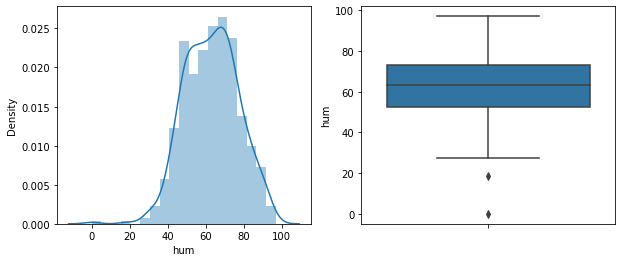

In [635]:
# Box plot and distplot for humidity variable of training dataset
plt.figure(figsize =(10,4))
plt.subplot(1,2,1)
sns.distplot(data_train['hum'])
plt.subplot(1,2,2)
sns.boxplot(y= 'hum',data =data_train)
plt.show()

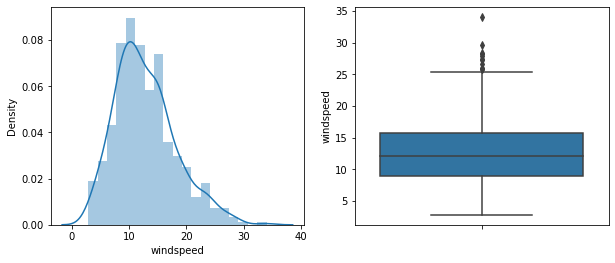

In [636]:
# Box plot and distplot for windspeed variable of training dataset
plt.figure(figsize =(10,4))
plt.subplot(1,2,1)
sns.distplot(data_train['windspeed'])
plt.subplot(1,2,2)
sns.boxplot(y= 'windspeed',data =data_train)
plt.show()

Observation:
       
        There are some outliers in hum and windspeed variables. We can apply Standardization for scaling

In [637]:
# Import libraries for Standardization
from sklearn.preprocessing import StandardScaler

# Create an object of StandardScaler 
scaler = StandardScaler() 

# Apply scaler to all the continuous independent variables (temp,hum,windspeed) 
# Don't apply for dummy variables and binary categorical variables

data_train[con_var] = scaler.fit_transform(data_train[con_var])

In [638]:
data_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
653,1,0,1,-0.121335,-0.514725,-0.117752,1.562685,0,0,1,...,0,0,1,0,0,0,0,0,0,1
576,1,0,1,1.231731,0.516433,-0.330615,1.399629,0,0,0,...,0,0,0,0,0,0,0,0,0,1
426,1,0,0,-0.420478,-0.069854,-0.385694,-0.215554,1,0,0,...,0,0,0,0,0,0,1,0,0,0
728,1,0,1,-1.294913,-1.045032,2.018143,-1.379511,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,-0.627580,-1.000840,-0.779889,-0.136589,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [639]:
scaler.get_params()

{'copy': True, 'with_mean': True, 'with_std': True}

In [640]:
scaler.mean_

array([  20.10242868,   63.11292569,   12.83131818, 4486.38235294])

In [641]:
data_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
count,510.000000,510.000000,510.000000,5.100000e+02,5.100000e+02,5.100000e+02,5.100000e+02,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,-2.687393e-16,-3.459107e-16,-2.351061e-16,-5.398732e-17,0.243137,0.245098,0.24902,...,0.084314,0.086275,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294
std,0.500429,0.157763,0.453386,1.000982e+00,1.000982e+00,1.000982e+00,1.000982e+00,0.429398,0.430568,0.43287,...,0.278131,0.281045,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373
min,0.000000,0.000000,0.000000,-2.381246e+00,-4.462565e+00,-1.890981e+00,-2.289141e+00,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,-8.749555e-01,-7.666192e-01,-7.167878e-01,-7.006213e-01,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,1.443562e-02,2.294988e-02,-1.415145e-01,2.236523e-02,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,8.773604e-01,7.167702e-01,5.522525e-01,7.625291e-01,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,2.050938e+00,2.399023e+00,4.004188e+00,2.167738e+00,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [642]:
corr_matrix = data_train.corr()

In [643]:
corr_matrix

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
yr,1.000000,-0.014980,-0.003005,0.107288,-0.084792,-0.001108,0.591508,-0.036320,0.013856,-0.022638,...,-0.025933,-0.018790,-0.018790,0.002574,-0.033817,-0.017733,0.016537,0.032785,0.026024,0.010995
holiday,-0.014980,1.000000,-0.254149,-0.066282,-0.029093,0.017569,-0.095961,0.053339,-0.063232,0.050712,...,-0.049076,0.127543,-0.005387,0.043692,-0.069242,-0.025291,-0.028355,-0.066102,0.034971,0.190636
workingday,-0.003005,-0.254149,1.000000,-0.007643,0.020701,-0.002504,-0.008723,-0.032886,0.030488,0.036097,...,0.021720,0.025939,0.025939,-0.034746,0.272446,-0.605864,-0.626783,0.260091,0.234321,0.163120
temp,0.107288,-0.066282,-0.007643,1.000000,0.155415,-0.187396,0.643517,-0.605988,0.125582,-0.233697,...,0.155415,-0.194765,-0.018709,0.207457,-0.037708,0.025276,0.006854,0.074973,-0.001951,-0.046291
hum,-0.084792,-0.029093,0.020701,0.155415,1.000000,-0.266895,-0.059993,-0.201134,-0.013216,0.171579,...,0.145604,0.004910,0.162014,0.152628,-0.030499,0.002783,-0.027388,-0.056997,0.033548,0.026395
windspeed,-0.001108,0.017569,-0.002504,-0.187396,-0.266895,1.000000,-0.253794,0.180743,0.110089,-0.090649,...,-0.034137,0.009952,-0.018973,-0.121734,0.035390,-0.016284,0.018278,-0.021502,0.035616,-0.057518
cnt,0.591508,-0.095961,-0.008723,0.643517,-0.059993,-0.253794,1.000000,-0.548871,0.134343,0.032636,...,0.113027,-0.048130,0.065692,0.201327,-0.071188,0.012496,0.031237,0.110430,-0.018885,-0.019578
season_spring,-0.036320,0.053339,-0.032886,-0.605988,-0.201134,0.180743,-0.548871,1.000000,-0.322955,-0.326377,...,-0.171986,-0.174161,-0.174161,-0.167580,0.010007,-0.000641,0.013022,-0.048931,-0.012251,0.002987
season_summer,0.013856,-0.063232,0.030488,0.125582,-0.013216,0.110089,0.134343,-0.322955,1.000000,-0.328116,...,0.532539,-0.175089,-0.175089,-0.168473,-0.017169,-0.002397,-0.015325,0.066484,-0.001490,-0.012151
season_winter,-0.022638,0.050712,0.036097,-0.233697,0.171579,-0.090649,0.032636,-0.326377,-0.328116,1.000000,...,-0.174734,0.533619,0.533619,-0.020175,0.016635,-0.019389,-0.032037,-0.054098,0.045054,0.050608


In [644]:
corr_matrix['cnt'].sort_values(ascending = False)

cnt                      1.000000
temp                     0.643517
yr                       0.591508
mnth_Aug                 0.227229
mnth_Sep                 0.201327
mnth_June                0.187821
mnth_July                0.157812
season_summer            0.134343
mnth_May                 0.113027
weekday_Thursday         0.110430
mnth_Oct                 0.065692
season_winter            0.032636
weekday_Sunday           0.031237
weekday_Saturday         0.012496
workingday              -0.008723
weekday_Tuesday         -0.018885
weekday_Wednesday       -0.019578
mnth_Nov                -0.048130
hum                     -0.059993
weekday_Monday          -0.071188
holiday                 -0.095961
mnth_Mar                -0.137537
mnth_Dec                -0.143598
weathersit_mist         -0.175530
weathersit_light_snow   -0.226598
windspeed               -0.253794
mnth_Feb                -0.270287
mnth_Jan                -0.378173
season_spring           -0.548871
Name: cnt, dty

Observation: 
   1. The top 5 variables which are positively correlated with our target variable cnt are ,
   
          a. temp      0.643517      
          b. yr        0.591508      
          c. mnth_Aug  0.227229      
          d. mnth_Sep  0.201327      
          e. mnth_June 0.187821
      
      
   2. The top 5 variables which are negatively correlated with our target variable cnt are 
   
          a. season_spring           -0.548871
          b. mnth_Jan                -0.378173      
          c. mnth_Feb                -0.270287      
          d. windspeed               -0.253794      
          e. weathersit_light_snow   -0.226598
    

**Insights:**
    temp avriable is highly positively correlated with cnt
    season_spring is negatively correlated with cnt

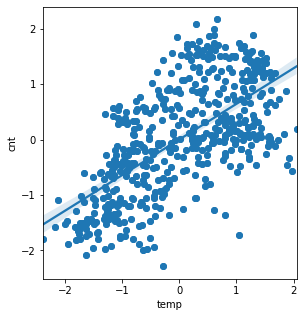

In [645]:
# plot a scatter graph for temp and cnt
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
plt.scatter(data_train.temp, data_train.cnt)
sns.regplot(data = data_train, x='temp',y='cnt')
plt.show()

Observation :
        
  We can build a model with Linear Regression because the $temp$ and $cnt$ variables are highly positively correlated with each other.

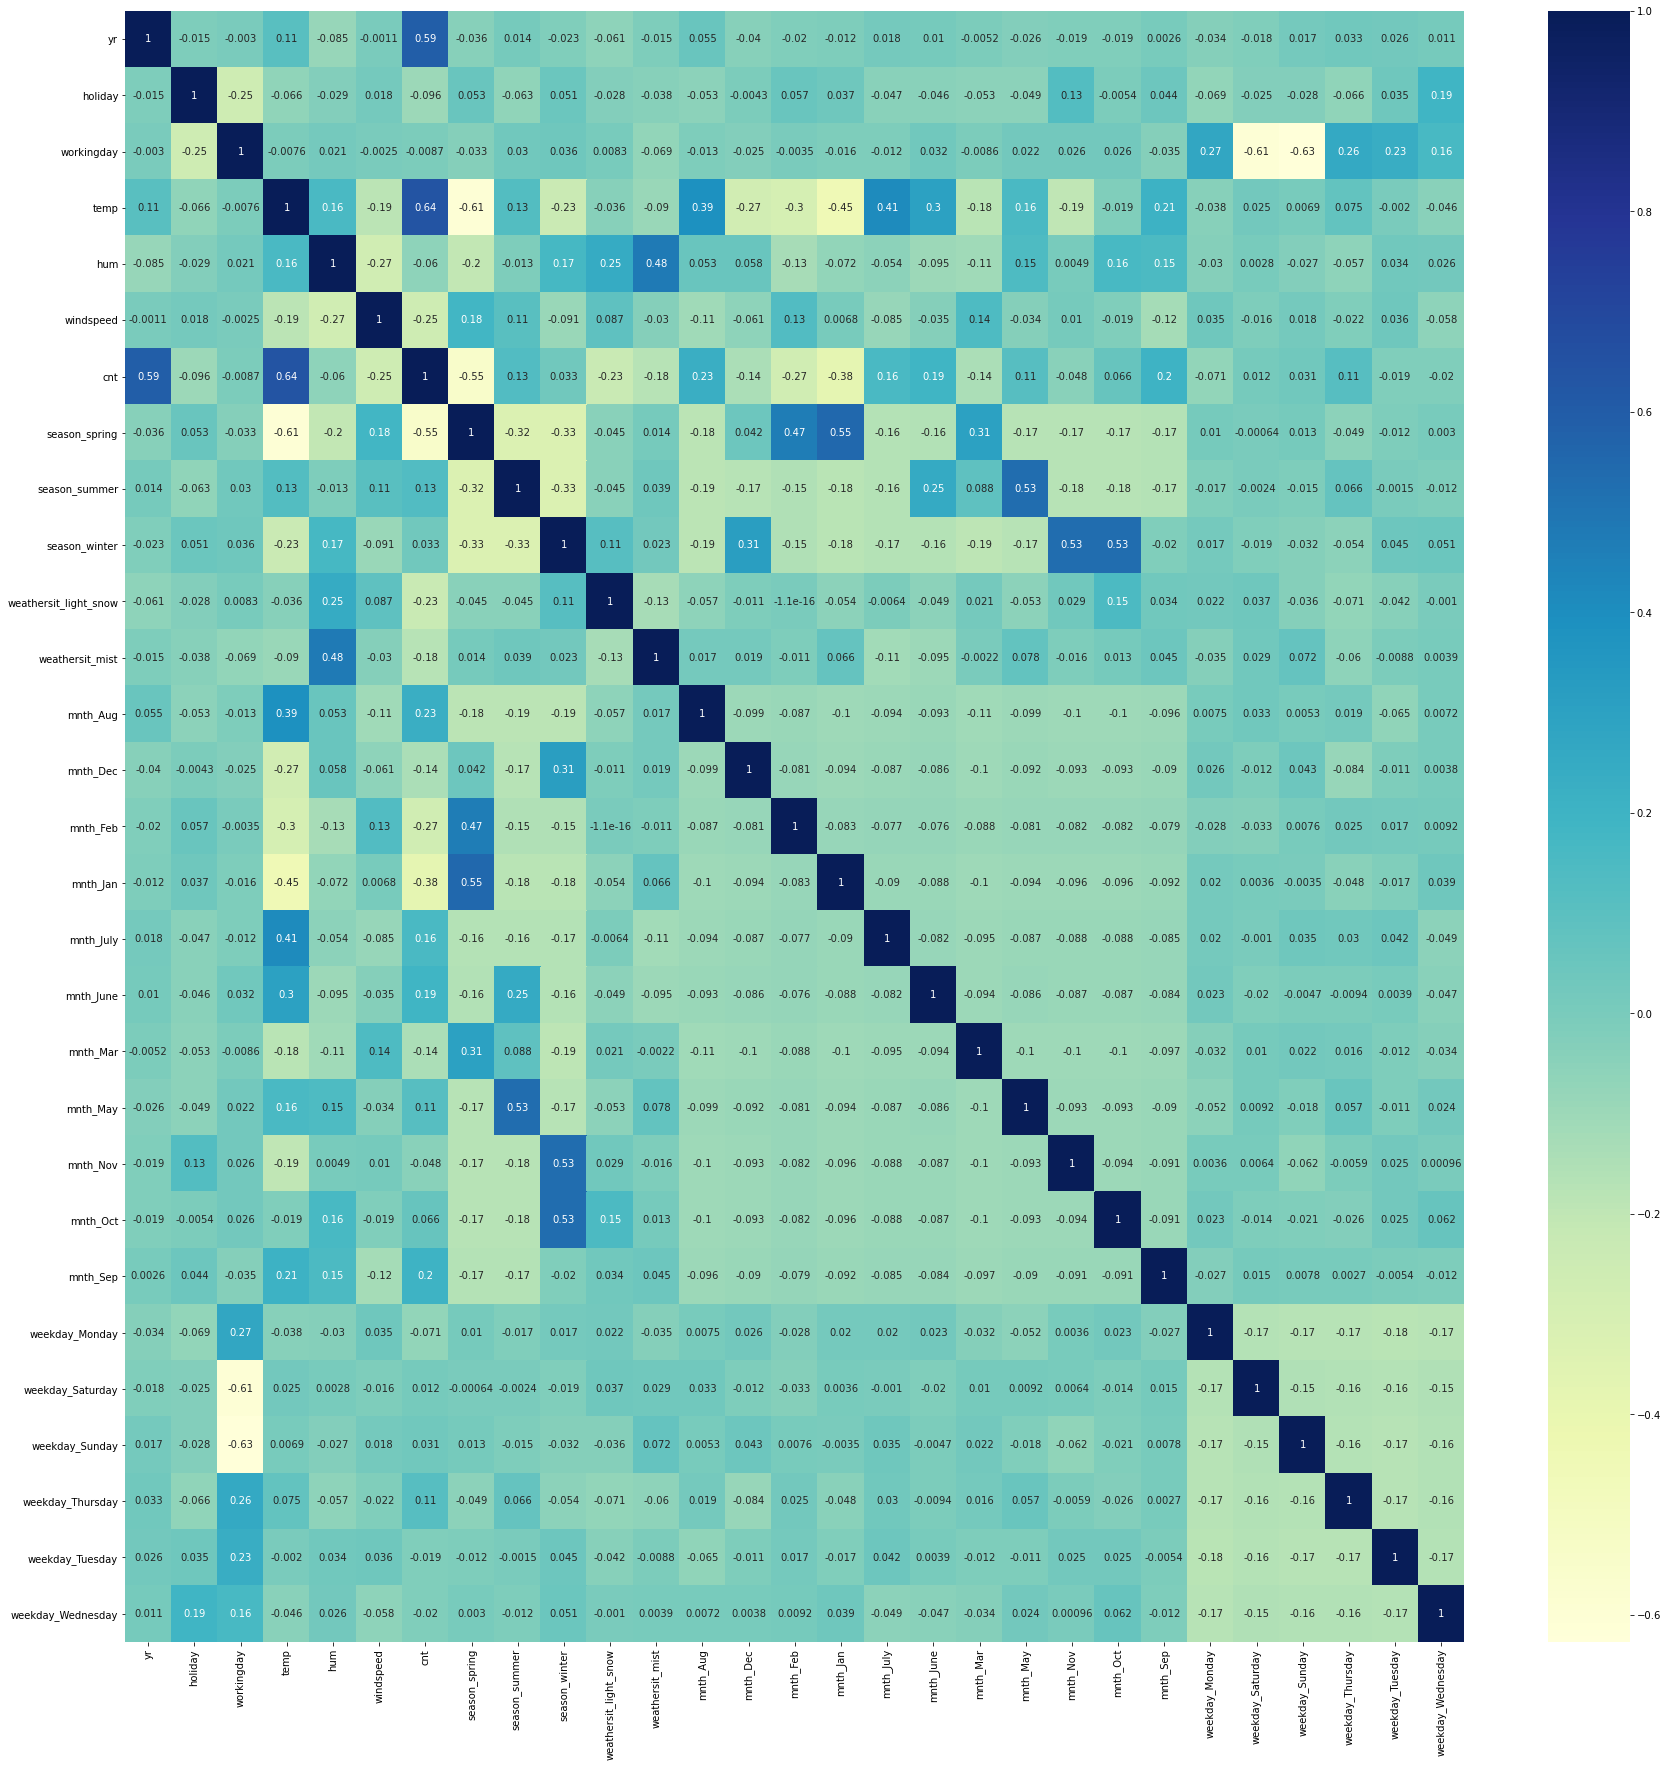

In [646]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (30, 30))
sns.heatmap(data_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

## 6.4. Divide data into dependent and indipendent variables

In [647]:
# Divide the train dataset into X(independent) and y(dependent) variables datasets
y_train = data_train.pop('cnt')
X_train = data_train

In [648]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,weathersit_light_snow,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
653,1,0,1,-0.121335,-0.514725,-0.117752,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
576,1,0,1,1.231731,0.516433,-0.330615,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
426,1,0,0,-0.420478,-0.069854,-0.385694,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
728,1,0,1,-1.294913,-1.045032,2.018143,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,-0.627580,-1.000840,-0.779889,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


# 7. Model Building

### 7.1 Model 1: Included all the independent variables 

In [649]:
# import statsmodel libraries to build linear regression
import statsmodels.api as sm

# Add one column to the X_train dataset to store the coefficients of the independent variables
X_train_lr = sm.add_constant(X_train) 

# Create linear regression model
lr_model = sm.OLS(y_train, X_train_lr).fit()

lr_model.params

const                   -0.181738
yr                       1.028901
holiday                 -0.603568
workingday              -0.269749
temp                     0.447940
hum                     -0.102182
windspeed               -0.138387
season_spring           -0.194787
season_summer            0.188271
season_winter            0.494254
weathersit_light_snow   -1.120953
weathersit_mist         -0.264539
mnth_Aug                 0.095854
mnth_Dec                -0.203542
mnth_Feb                -0.166147
mnth_Jan                -0.283510
mnth_July               -0.155588
mnth_June                0.004343
mnth_Mar                 0.002710
mnth_May                 0.107251
mnth_Nov                -0.185204
mnth_Oct                 0.025805
mnth_Sep                 0.383537
weekday_Monday          -0.109786
weekday_Saturday        -0.251007
weekday_Sunday          -0.222672
weekday_Thursday         0.017218
weekday_Tuesday         -0.117212
weekday_Wednesday       -0.050099
dtype: float64

In [650]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     98.04
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          4.33e-179
Time:                        18:53:05   Log-Likelihood:                -238.36
No. Observations:                 510   AIC:                             534.7
Df Residuals:                     481   BIC:                             657.5
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1817      0.347     -0.524      0.600      -0.863       0.499
yr                        1.0289      0.036     28.387      0.000       0.958       1.100
holiday                  -0.6036      0.291     -2.072      0.039      -1.176      -0.031
workingday               -0.2697      0.317     -0.852      0.395      -0.892       0.352
temp                      0.4479      0.047      9.513      0.000       0.355       0.540
hum                      -0.1022      0.025     -4.049      0.000      -0.152      -0.053
windspeed                -0.1384      0.020     -7.036      0.000      -0.177      -0.100
season_spring            -0.1948      0.135     -1.444      0.149      -0.460       0.070
season_summer             0.1883      0.118      1.598      0.111      -0.043       0.420
season_winter             0.4943      0.126      3.938      0.000       0.248       0.741
weathersit_light_snow    -1.1210      0.119     -9.455      0.000      -1.354      -0.888
weathersit_mist          -0.2645      0.047     -5.637      0.000      -0.357      -0.172
mnth_Aug                  0.0959      0.152      0.632      0.527      -0.202       0.394
mnth_Dec                 -0.2035      0.151     -1.348      0.178      -0.500       0.093
mnth_Feb                 -0.1661      0.148     -1.121      0.263      -0.457       0.125
mnth_Jan                 -0.2835      0.151     -1.880      0.061      -0.580       0.013
mnth_July                -0.1556      0.158     -0.985      0.325      -0.466       0.155
mnth_June                 0.0043      0.113      0.038      0.969      -0.217       0.226
mnth_Mar                  0.0027      0.110      0.025      0.980      -0.214       0.219
mnth_May                  0.1073      0.095      1.134      0.257      -0.079       0.293
mnth_Nov                 -0.1852      0.163     -1.133      0.258      -0.506       0.136
mnth_Oct                  0.0258      0.161      0.160      0.873      -0.291       0.342
mnth_Sep                  0.3835      0.144      2.667      0.008       0.101       0.666
weekday_Monday           -0.1098      0.065     -1.690      0.092      -0.237       0.018
weekday_Saturday         -0.2510      0.319     -0.787      0.432      -0.878       0.376
weekday_Sunday           -0.2227      0.319     -0.699      0.485      -0.849       0.403
weekday_Thursday          0.0172      0.067      0.258      0.796      -0.114       0.148
weekday_Tuesday          -0.1172      0.065     -1.792      0.074      -0.246       0.011
weekday_Wednesday        -0.0501      0.068     -0.736      0.462      -0.184       0.084
==============================================================================
Omnibus:                       78.889   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarqu

**Observation:** 

* This model has an Adjusted R-squared value of **84.2%** which seems pretty good. But let us see if we can reduce the number of features and exclude those which are not much relevant in explaining the target variable. 

**Decision:**

* There are 28 features in our dataset.It is difficult to mannually check each features and eliminate each features one by one to build models. Let us now build a model using recursive feature elimination to select features. We will first start off with an arbitrary number of features (15 seems to be a good number to begin with), and then use the statsmodels library to build models using the shortlisted features (this is also because SKLearn doesn't have Adjusted R-squared that statsmodels has).

In [651]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [652]:
feature_data=X_train_lr.drop('const',axis=1)
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = feature_data.columns
vif['VIF'] = [variance_inflation_factor(feature_data.values, i) for i in range(feature_data.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,38.71
6,season_spring,13.52
8,season_winter,12.53
7,season_summer,9.73
24,weekday_Sunday,7.75
23,weekday_Saturday,7.43
19,mnth_Nov,7.17
3,temp,7.11
20,mnth_Oct,6.81
11,mnth_Aug,6.46


In [653]:
X_train.shape

(510, 28)

## 7.2 Building Models using both 'RFE' method for automation of feature elimination and 'statsmodel' for the detailed statistics

## 7.2.1 Model 2: (Build the model by considering top 15 features)
### Model building using RFE method

In [654]:
# Import RFE (Recursive Feature Elimination)
from sklearn.feature_selection import RFE
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [655]:
#Define Functions for RFE
def RFE_func(X_train,y_train,n_features):
    # RFE with n_features
    lr_model = LinearRegression()
    rfe = RFE(lr_model, n_features_to_select =n_features)

    # Fit with n_features
    rfe.fit(X_train, y_train)

    return rfe 

In [656]:
# fit the model using RFE with 15 features
rfe1 = RFE_func(X_train,y_train,15)
print(rfe1.support_)
print(rfe1.ranking_)

[ True  True False  True False  True  True  True  True  True  True False
  True  True  True  True False False False  True False  True False False
 False False False False]
[ 1  1  2  1  6  1  1  1  1  1  1  9  1  1  1  1 13 14  5  1 11  1  8  3
  4 12  7 10]


In [657]:
# Display the features and there rankings
list(zip(X_train.columns,rfe1.support_,rfe1.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('hum', False, 6),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('weathersit_light_snow', True, 1),
 ('weathersit_mist', True, 1),
 ('mnth_Aug', False, 9),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_July', True, 1),
 ('mnth_June', False, 13),
 ('mnth_Mar', False, 14),
 ('mnth_May', False, 5),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 11),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 8),
 ('weekday_Saturday', False, 3),
 ('weekday_Sunday', False, 4),
 ('weekday_Thursday', False, 12),
 ('weekday_Tuesday', False, 7),
 ('weekday_Wednesday', False, 10)]

In [658]:
X_train.columns[rfe1.support_ == True]

Index(['yr', 'holiday', 'temp', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'weathersit_light_snow', 'weathersit_mist', 'mnth_Dec',
       'mnth_Feb', 'mnth_Jan', 'mnth_July', 'mnth_Nov', 'mnth_Sep'],
      dtype='object')

**Observation :**

    Top 15 selected features by REF method

   * 'yr', 'holiday', 'temp', 'windspeed', 'season_spring', 'season_summer','season_winter', 'weathersit_light_snow', 'weathersit_mist', 'mnth_Dec','mnth_Feb', 'mnth_Jan', 'mnth_July', 'mnth_Nov', 'mnth_Sep'

### Model Building and Evaluation using statsmodel

Let's now check the summary of this model using `statsmodels`.

In [659]:
# Import statsmodels
import statsmodels.api as sm  

In [660]:
# Defining the function to create model using statsmodel
def create_statsmodel(X_train,rfe):
    # Subset the features selected by rfe
    col = X_train.columns[rfe.support_]

    # Subsetting training data for n_features selected columns
    X_train_rfe = X_train[col]

    # Add a constant to the model
    X_train_rfe = sm.add_constant(X_train_rfe)
    
    # Fitting the model with n_feature variables
    lm = sm.OLS(y_train, X_train_rfe).fit()   

    return X_train_rfe, lm

In [661]:
# Create a model using statsmodels by fitting top 15 feature variables
X_train_rfe1,lm1 = create_statsmodel(X_train,rfe1)
print(lm1.summary()) # Check the statistical summary of Model2

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     174.0
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          4.55e-186
Time:                        18:53:06   Log-Likelihood:                -254.93
No. Observations:                 510   AIC:                             541.9
Df Residuals:                     494   BIC:                             609.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.34

In [662]:
X_train_rfe1.head()

,const,yr,holiday,temp,windspeed,season_spring,season_summer,season_winter,weathersit_light_snow,weathersit_mist,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_Nov,mnth_Sep
653,1.0,1,0,-0.121335,-0.117752,0,0,1,0,0,0,0,0,0,0,0
576,1.0,1,0,1.231731,-0.330615,0,0,0,0,0,0,0,0,1,0,0
426,1.0,1,0,-0.420478,-0.385694,1,0,0,0,1,0,0,0,0,0,0
728,1.0,1,0,-1.294913,2.018143,1,0,0,0,0,1,0,0,0,0,0
482,1.0,1,0,-0.627580,-0.779889,0,1,0,0,1,0,0,0,0,0,0


**Observation:**

Note that the new model built on the selected features doesn't show much dip in the accuracy in comparison to the model which was built on all the features. The Adjusted R-Square value has gone from 84.2% to 83.6%. This is indeed a good indication to proceed with these selected features.

But let's check for the multicollinearity among these variables.

In [663]:
# Import library helps to create VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [664]:
#Define function to check for the VIF values of the feature variables
def check_VIF(X_train_rfe):
    feature_data=X_train_rfe.drop('const',axis=1)
    # Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
    vif = pd.DataFrame()
    vif['Features'] = feature_data.columns
    vif['VIF'] = [variance_inflation_factor(feature_data.values, i) for i in range(feature_data.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [665]:
vif1 = check_VIF(X_train_rfe1)
vif1

,Features,VIF
4,season_spring,3.77
2,temp,2.86
6,season_winter,2.64
11,mnth_Jan,2.45
0,yr,1.96
10,mnth_Feb,1.94
13,mnth_Nov,1.86
9,mnth_Dec,1.66
8,weathersit_mist,1.52
12,mnth_July,1.40


**Observation:**
    
    The VIF of all the feature variables are less than 5. That indicated there is no multicollinearity issue.

In [666]:
#############################################################################################################

## Model 2.1

In [667]:

# Subsetting training data for 14 selected columns by removing mnth_Feb from Model2
X_train_rfe11 = X_train_rfe1.drop('mnth_Feb',axis = 1)

# Add a constant to the model
X_train_rfe11 = sm.add_constant(X_train_rfe11)
X_train_rfe11.head()

,const,yr,holiday,temp,windspeed,season_spring,season_summer,season_winter,weathersit_light_snow,weathersit_mist,mnth_Dec,mnth_Jan,mnth_July,mnth_Nov,mnth_Sep
653,1.0,1,0,-0.121335,-0.117752,0,0,1,0,0,0,0,0,0,0
576,1.0,1,0,1.231731,-0.330615,0,0,0,0,0,0,0,1,0,0
426,1.0,1,0,-0.420478,-0.385694,1,0,0,0,1,0,0,0,0,0
728,1.0,1,0,-1.294913,2.018143,1,0,0,0,0,1,0,0,0,0
482,1.0,1,0,-0.627580,-0.779889,0,1,0,0,1,0,0,0,0,0


In [668]:
# Create a model using statsmodels by fitting top 14 feature variables
# Fitting the model with top 14 feature variables
lm11 = sm.OLS(y_train, X_train_rfe11).fit()   
lm11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          1.57e-186
Time:                        18:53:07   Log-Likelihood:                -256.56
No. Observations:                 510   AIC:                             543.1
Df Residuals:                     495   BIC:                             606.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.3687      0.067     -5.516      0.000      -0.500      -0.237
yr                        1.0442      0.036     28.709      0.000       0.973       1.116
holiday                  -0.4097      0.116     -3.533      0.000      -0.637      -0.182
temp                      0.4401      0.036     12.083      0.000       0.369       0.512
windspeed                -0.1199      0.019     -6.290      0.000      -0.157      -0.082
season_spring            -0.3193      0.096     -3.337      0.001      -0.507      -0.131
season_summer             0.1483      0.069      2.148      0.032       0.013       0.284
season_winter             0.3951      0.080      4.951      0.000       0.238       0.552
weathersit_light_snow    -1.3054      0.110    -11.908      0.000      -1.521      -1.090
weathersit_mist          -0.3630      0.039     -9.359      0.000      -0.439      -0.287
mnth_Dec                 -0.1985      0.079     -2.520      0.012      -0.353      -0.044
mnth_Jan                 -0.2240      0.082     -2.738      0.006      -0.385      -0.063
mnth_July                -0.2245      0.082     -2.725      0.007      -0.386      -0.063
mnth_Nov                 -0.1865      0.085     -2.198      0.028      -0.353      -0.020
mnth_Sep                  0.3040      0.076      3.992      0.000       0.154       0.454
==============================================================================
Omnibus:                       70.031   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.566
Skew:                          -0.702   Prob(JB):                     7.52e-39
Kurtosis:                       5.508   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [669]:
#Create VIF for the top 14 feature variables
vif11 = check_VIF(X_train_rfe11)
vif11

,Features,VIF
2,temp,2.74
4,season_spring,2.64
6,season_winter,2.63
0,yr,1.95
12,mnth_Nov,1.83
10,mnth_Jan,1.78
9,mnth_Dec,1.54
8,weathersit_mist,1.52
11,mnth_July,1.39
5,season_summer,1.38


## Model 2.2

In [670]:
# Subsetting training data for 13 selected columns by removing season_summer from Model1.1
X_train_rfe12 = X_train_rfe11.drop('season_summer',axis = 1)

# Add a constant to the model
X_train_rfe12 = sm.add_constant(X_train_rfe12)
X_train_rfe12.head()

,const,yr,holiday,temp,windspeed,season_spring,season_winter,weathersit_light_snow,weathersit_mist,mnth_Dec,mnth_Jan,mnth_July,mnth_Nov,mnth_Sep
653,1.0,1,0,-0.121335,-0.117752,0,1,0,0,0,0,0,0,0
576,1.0,1,0,1.231731,-0.330615,0,0,0,0,0,0,1,0,0
426,1.0,1,0,-0.420478,-0.385694,1,0,0,1,0,0,0,0,0
728,1.0,1,0,-1.294913,2.018143,1,0,0,0,1,0,0,0,0
482,1.0,1,0,-0.627580,-0.779889,0,0,0,1,0,0,0,0,0


In [671]:
# Create a model using statsmodels by fitting top 13 feature variables
# Fitting the model with top 132 feature variables
lm12 = sm.OLS(y_train, X_train_rfe12).fit()   
lm12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.9
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          1.08e-186
Time:                        18:53:07   Log-Likelihood:                -258.93
No. Observations:                 510   AIC:                             545.9
Df Residuals:                     496   BIC:                             605.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.2558      0.041     -6.170      0.000      -0.337      -0.174
yr                        1.0465      0.036     28.679      0.000       0.975       1.118
holiday                  -0.4068      0.116     -3.496      0.001      -0.635      -0.178
temp                      0.4048      0.033     12.407      0.000       0.341       0.469
windspeed                -0.1164      0.019     -6.108      0.000      -0.154      -0.079
season_spring            -0.4607      0.070     -6.613      0.000      -0.598      -0.324
season_winter             0.2896      0.063      4.588      0.000       0.166       0.414
weathersit_light_snow    -1.3143      0.110    -11.954      0.000      -1.530      -1.098
weathersit_mist          -0.3619      0.039     -9.297      0.000      -0.438      -0.285
mnth_Dec                 -0.2272      0.078     -2.918      0.004      -0.380      -0.074
mnth_Jan                 -0.2479      0.081     -3.047      0.002      -0.408      -0.088
mnth_July                -0.2868      0.077     -3.705      0.000      -0.439      -0.135
mnth_Nov                 -0.2176      0.084     -2.593      0.010      -0.383      -0.053
mnth_Sep                  0.2392      0.070      3.409      0.001       0.101       0.377
==============================================================================
Omnibus:                       70.900   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.224
Skew:                          -0.695   Prob(JB):                     3.65e-41
Kurtosis:                       5.614   Cond. No.                         8.34
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [672]:
#Create VIF for the top 13 feature variables
vif12 = check_VIF(X_train_rfe12)
vif12

,Features,VIF
2,temp,2.74
4,season_spring,2.55
5,season_winter,2.54
11,mnth_Nov,1.83
9,mnth_Jan,1.78
0,yr,1.69
8,mnth_Dec,1.54
7,weathersit_mist,1.37
10,mnth_July,1.37
12,mnth_Sep,1.18


## Model 2.3

In [673]:
# Subsetting training data for 12 selected columns by removing mnth_Dec from Model1.2
X_train_rfe13 = X_train_rfe12.drop('mnth_Dec',axis = 1)

# Add a constant to the model
X_train_rfe13 = sm.add_constant(X_train_rfe13)
X_train_rfe13.head()

,const,yr,holiday,temp,windspeed,season_spring,season_winter,weathersit_light_snow,weathersit_mist,mnth_Jan,mnth_July,mnth_Nov,mnth_Sep
653,1.0,1,0,-0.121335,-0.117752,0,1,0,0,0,0,0,0
576,1.0,1,0,1.231731,-0.330615,0,0,0,0,0,1,0,0
426,1.0,1,0,-0.420478,-0.385694,1,0,0,1,0,0,0,0
728,1.0,1,0,-1.294913,2.018143,1,0,0,0,0,0,0,0
482,1.0,1,0,-0.627580,-0.779889,0,0,0,1,0,0,0,0


In [674]:
# Create a model using statsmodels by fitting top 12 feature variables
# Fitting the model with top 12 feature variables
lm13 = sm.OLS(y_train, X_train_rfe13).fit()   
lm13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     210.5
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          4.86e-186
Time:                        18:53:07   Log-Likelihood:                -263.27
No. Observations:                 510   AIC:                             552.5
Df Residuals:                     497   BIC:                             607.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.2735      0.041     -6.618      0.000      -0.355      -0.192
yr                        1.0469      0.037     28.477      0.000       0.975       1.119
holiday                  -0.4125      0.117     -3.519      0.000      -0.643      -0.182
temp                      0.4297      0.032     13.542      0.000       0.367       0.492
windspeed                -0.1107      0.019     -5.795      0.000      -0.148      -0.073
season_spring            -0.4631      0.070     -6.599      0.000      -0.601      -0.325
season_winter             0.2295      0.060      3.817      0.000       0.111       0.348
weathersit_light_snow    -1.2901      0.110    -11.680      0.000      -1.507      -1.073
weathersit_mist          -0.3597      0.039     -9.174      0.000      -0.437      -0.283
mnth_Jan                 -0.1932      0.080     -2.422      0.016      -0.350      -0.036
mnth_July                -0.3044      0.078     -3.915      0.000      -0.457      -0.152
mnth_Nov                 -0.1257      0.078     -1.604      0.109      -0.280       0.028
mnth_Sep                  0.2529      0.071      3.585      0.000       0.114       0.392
==============================================================================
Omnibus:                       62.130   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.383
Skew:                          -0.637   Prob(JB):                     2.21e-33
Kurtosis:                       5.336   Cond. No.                         8.29
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [675]:
#Create VIF for the top 12 feature variables
vif13 = check_VIF(X_train_rfe13)
vif13

,Features,VIF
2,temp,2.61
4,season_spring,2.52
5,season_winter,2.08
8,mnth_Jan,1.69
0,yr,1.68
10,mnth_Nov,1.59
7,weathersit_mist,1.37
9,mnth_July,1.36
11,mnth_Sep,1.18
3,windspeed,1.10


**Observation:**

* VIF values of all Model 2.1 ,2.2, 2.3 are less than 5 indicates that there is no multicollinearity issue among the selected predictors.
* p-value of all the Models 2.1, 2.2, 2.3 are less than 0.05 indicates that all the predictors selected are significant.
* Adjusted R-square value of Models 2.1, 2.2, 2.3 are 83.5% 83.4%, 83.3% respectively. All the models are good fit with the selected predictors

**Decision:**

* We want to reduce the complexity of the model by reducing the features.
* Let us take the top 10 features to build the model

In [676]:
#############################################################################################################

## 7.2.2 Model3 (Build the model by considering top 10 features):

### Model building using RFE method (Top 10 features)

In [677]:
# fit the model using RFE with 10 features
rfe2 = RFE_func(X_train,y_train,10)
print(rfe2.support_)
print(rfe2.ranking_)

[ True  True False  True False False  True False  True  True  True False
 False False False  True False False False  True False  True False False
 False False False False]
[ 1  1  7  1 11  6  1  5  1  1  1 14  2  4  3  1 18 19 10  1 16  1 13  8
  9 17 12 15]


In [678]:
# Display the features and there rankings
list(zip(X_train.columns,rfe2.support_,rfe2.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 7),
 ('temp', True, 1),
 ('hum', False, 11),
 ('windspeed', False, 6),
 ('season_spring', True, 1),
 ('season_summer', False, 5),
 ('season_winter', True, 1),
 ('weathersit_light_snow', True, 1),
 ('weathersit_mist', True, 1),
 ('mnth_Aug', False, 14),
 ('mnth_Dec', False, 2),
 ('mnth_Feb', False, 4),
 ('mnth_Jan', False, 3),
 ('mnth_July', True, 1),
 ('mnth_June', False, 18),
 ('mnth_Mar', False, 19),
 ('mnth_May', False, 10),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 16),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 13),
 ('weekday_Saturday', False, 8),
 ('weekday_Sunday', False, 9),
 ('weekday_Thursday', False, 17),
 ('weekday_Tuesday', False, 12),
 ('weekday_Wednesday', False, 15)]

In [679]:
X_train.columns[rfe2.support_ == True]

Index(['yr', 'holiday', 'temp', 'season_spring', 'season_winter',
       'weathersit_light_snow', 'weathersit_mist', 'mnth_July', 'mnth_Nov',
       'mnth_Sep'],
      dtype='object')

**Observation:**

    Top 10 selected features by REF method
    
* 'yr', 'holiday', 'temp', 'season_spring', 'season_winter','weathersit_light_snow', 'weathersit_mist', 'mnth_July', 'mnth_Nov', 'mnth_Sep'

### Model Building and Evaluation using statsmodel (Using Top 10 features) 

Let's now check the summary of this model using `statsmodels`.

In [680]:
# Create a model using statsmodels by fitting top 10 feature variables
X_train_rfe2,lm2 = create_statsmodel(X_train,rfe2)


In [681]:
X_train_rfe2.head()

,const,yr,holiday,temp,season_spring,season_winter,weathersit_light_snow,weathersit_mist,mnth_July,mnth_Nov,mnth_Sep
653,1.0,1,0,-0.121335,0,1,0,0,0,0,0
576,1.0,1,0,1.231731,0,0,0,0,1,0,0
426,1.0,1,0,-0.420478,1,0,0,1,0,0,0
728,1.0,1,0,-1.294913,1,0,0,0,0,0,0
482,1.0,1,0,-0.627580,0,0,0,1,0,0,0


In [682]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     233.0
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          7.68e-181
Time:                        18:53:07   Log-Likelihood:                -281.22
No. Observations:                 510   AIC:                             584.4
Df Residuals:                     499   BIC:                             631.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.2908      0.043     -6.829      0.000      -0.374      -0.207
yr                        1.0389      0.038     27.364      0.000       0.964       1.113
holiday                  -0.4245      0.121     -3.503      0.001      -0.663      -0.186
temp                      0.4668      0.032     14.755      0.000       0.405       0.529
season_spring            -0.5071      0.070     -7.218      0.000      -0.645      -0.369
season_winter             0.2899      0.061      4.740      0.000       0.170       0.410
weathersit_light_snow    -1.3461      0.114    -11.853      0.000      -1.569      -1.123
weathersit_mist          -0.3575      0.040     -8.834      0.000      -0.437      -0.278
mnth_July                -0.3022      0.080     -3.777      0.000      -0.459      -0.145
mnth_Nov                 -0.1422      0.081     -1.758      0.079      -0.301       0.017
mnth_Sep                  0.2830      0.073      3.897      0.000       0.140       0.426
==============================================================================
Omnibus:                       70.276   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              188.677
Skew:                          -0.682   Prob(JB):                     1.07e-41
Kurtosis:                       5.649   Cond. No.                         8.26
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Observation:**

Note that the Model3 built on the top 10 selected features has the R-Square value = 82.4% and the Adjusted R-Square value = 82% 

Model-1 with all the features: Adjusted R-square value = 84.2%
Model-2 (with top 15 features): Adjusted R-square value = 83.6%
Model-3 (with top 10 features): Adjusted R-square value = 82%:

* Model-3 shows Adjusted R-square value 82%. It is pretty good value.
* p-value of mnth_Nov is 0.08. The mnth_Nov is not so significant 


In [683]:
#Create VIF for the top 10 feature variables
vif2 = check_VIF(X_train_rfe2)
vif2

,Features,VIF
2,temp,2.44
3,season_spring,2.22
4,season_winter,2.03
0,yr,1.67
8,mnth_Nov,1.59
6,weathersit_mist,1.36
7,mnth_July,1.34
9,mnth_Sep,1.17
1,holiday,1.06
5,weathersit_light_snow,1.05


**Observation:**
    
    The VIF of all the feature variables are less than 5. That indicated there is no multicollinearity issue.

## 7.2.3 Model 4: (Create a model by removing the mnth_Nov from Model3)

In [684]:

# Subsetting training data for 9 selected columns by removing mnth_Nov from Model3
X_train_rfe3 = X_train_rfe2.drop('mnth_Nov',axis = 1)

# Add a constant to the model
X_train_rfe3 = sm.add_constant(X_train_rfe3)
X_train_rfe3.head()

,const,yr,holiday,temp,season_spring,season_winter,weathersit_light_snow,weathersit_mist,mnth_July,mnth_Sep
653,1.0,1,0,-0.121335,0,1,0,0,0,0
576,1.0,1,0,1.231731,0,0,0,0,1,0
426,1.0,1,0,-0.420478,1,0,0,1,0,0
728,1.0,1,0,-1.294913,1,0,0,0,0,0
482,1.0,1,0,-0.627580,0,0,0,1,0,0


In [685]:
# Create a model using statsmodels by fitting top 9 feature variables
# Fitting the model with top 9 feature variables
lm3 = sm.OLS(y_train, X_train_rfe3).fit()   
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.5
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          2.16e-181
Time:                        18:53:07   Log-Likelihood:                -282.79
No. Observations:                 510   AIC:                             585.6
Df Residuals:                     500   BIC:                             627.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.2970      0.043     -6.985      0.000      -0.381      -0.213
yr                        1.0386      0.038     27.300      0.000       0.964       1.113
holiday                  -0.4506      0.120     -3.740      0.000      -0.687      -0.214
temp                      0.4738      0.031     15.063      0.000       0.412       0.536
season_spring            -0.4934      0.070     -7.051      0.000      -0.631      -0.356
season_winter             0.2486      0.057      4.393      0.000       0.137       0.360
weathersit_light_snow    -1.3382      0.114    -11.768      0.000      -1.562      -1.115
weathersit_mist          -0.3546      0.041     -8.752      0.000      -0.434      -0.275
mnth_July                -0.3065      0.080     -3.824      0.000      -0.464      -0.149
mnth_Sep                  0.2932      0.073      4.042      0.000       0.151       0.436
==============================================================================
Omnibus:                       66.905   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              173.340
Skew:                          -0.661   Prob(JB):                     2.29e-38
Kurtosis:                       5.532   Cond. No.                         8.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [686]:
# Check the VIF for top 9 features
vif3 = check_VIF(X_train_rfe3)
vif3

,Features,VIF
2,temp,2.41
3,season_spring,2.21
0,yr,1.67
4,season_winter,1.55
6,weathersit_mist,1.36
7,mnth_July,1.34
8,mnth_Sep,1.16
5,weathersit_light_snow,1.05
1,holiday,1.04


**Observation:**

   * Adjusted R-square value is 81.9% is a pretty good value. VIF and p-values seems to be in permissible range now.
   
   * With 9 independent features it gives pretty good values for Adjusted R-square 81.9% ,VIF (should be <5) , and p-value 0 (should be <0.05)


**Observation:**
  
  * The Model4 is pretty good but let us try one last model of top 7 features just to get to reduce the complexity.

## 7.2.4 Model- 5 : (Build the model by top 7 features)

### Model building using RFE method (Top 7 features)

In [687]:
# fit the model using RFE with 10 features
rfe4 = RFE_func(X_train,y_train,7)
print(rfe4.support_)
print(rfe4.ranking_)

[ True  True False  True False False  True False False  True  True False
 False False False  True False False False False False False False False
 False False False False]
[ 1  1 10  1 14  9  1  8  3  1  1 17  5  7  6  1 21 22 13  4 19  2 16 11
 12 20 15 18]


In [688]:
# Display the features and there rankings
list(zip(X_train.columns,rfe4.support_,rfe4.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 10),
 ('temp', True, 1),
 ('hum', False, 14),
 ('windspeed', False, 9),
 ('season_spring', True, 1),
 ('season_summer', False, 8),
 ('season_winter', False, 3),
 ('weathersit_light_snow', True, 1),
 ('weathersit_mist', True, 1),
 ('mnth_Aug', False, 17),
 ('mnth_Dec', False, 5),
 ('mnth_Feb', False, 7),
 ('mnth_Jan', False, 6),
 ('mnth_July', True, 1),
 ('mnth_June', False, 21),
 ('mnth_Mar', False, 22),
 ('mnth_May', False, 13),
 ('mnth_Nov', False, 4),
 ('mnth_Oct', False, 19),
 ('mnth_Sep', False, 2),
 ('weekday_Monday', False, 16),
 ('weekday_Saturday', False, 11),
 ('weekday_Sunday', False, 12),
 ('weekday_Thursday', False, 20),
 ('weekday_Tuesday', False, 15),
 ('weekday_Wednesday', False, 18)]

In [689]:
X_train.columns[rfe4.support_ == True]

Index(['yr', 'holiday', 'temp', 'season_spring', 'weathersit_light_snow',
       'weathersit_mist', 'mnth_July'],
      dtype='object')

**Observation:**

    Top 7 selected features by REF method
    
* 'yr', 'holiday', 'temp', 'season_spring', 'weathersit_light_snow', 'weathersit_mist', 'mnth_July'

### Model Building and Evaluation using statsmodel (Using Top 7 features) 

Let's now check the summary of this model using `statsmodels`.

In [690]:
# Create a model using statsmodels by fitting top 7 feature variables
X_train_rfe4,lm4 = create_statsmodel(X_train,rfe4)

In [691]:
X_train_rfe4.head()

,const,yr,holiday,temp,season_spring,weathersit_light_snow,weathersit_mist,mnth_July
653,1.0,1,0,-0.121335,0,0,0,0
576,1.0,1,0,1.231731,0,0,0,1
426,1.0,1,0,-0.420478,1,0,1,0
728,1.0,1,0,-1.294913,1,0,0,0
482,1.0,1,0,-0.627580,0,0,1,0


In [692]:
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     305.7
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          1.72e-176
Time:                        18:53:07   Log-Likelihood:                -300.20
No. Observations:                 510   AIC:                             616.4
Df Residuals:                     502   BIC:                             650.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1669      0.036     -4.654      0.000      -0.237      -0.096
yr                        1.0412      0.039     26.524      0.000       0.964       1.118
holiday                  -0.3898      0.124     -3.144      0.002      -0.633      -0.146
temp                      0.4236      0.027     15.671      0.000       0.371       0.477
season_spring            -0.6835      0.058    -11.832      0.000      -0.797      -0.570
weathersit_light_snow    -1.2783      0.117    -10.930      0.000      -1.508      -1.049
weathersit_mist          -0.3495      0.042     -8.369      0.000      -0.432      -0.267
mnth_July                -0.3681      0.081     -4.525      0.000      -0.528      -0.208
==============================================================================
Omnibus:                       55.460   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.253
Skew:                          -0.577   Prob(JB):                     3.15e-29
Kurtosis:                       5.201   Cond. No.                         7.92
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Observation:**

Note that the Model2 built on the top 10 selected features has the R-Square value = 81% and the Adjusted R-Square value = 80.7% 

Model-1 with all the features: Adjusted R-square value = 84.2%

Model-2 (with top 15 features): Adjusted R-square value = 83.6%

Model-3 (with top 10 features): Adjusted R-square value = 82%

Model-4 (with top 9 features): Adjusted R-square value = 81.9%  

Model-5 (with top 7 features): Adjusted R-square value = 80.7%

* Model-5 shows Adjusted R-square value 80.7%. It is pretty good value and there is no much difference between the R-square and Adjusted R-square value.
* p-value of holiday is 0.002 which is less than 0.05 and all other features has 0 p-value. This tells that all the selected features are significant.


**Model 5 :** All the VIF values and p-values seem to be in the permissible range . Also the `Adjusted R-squared` value has dropped from `84.2%` with **28 variables** to just `80.7%` using **7 variables**. p-value of holiday is 0.002 which is less than 0.05. This model is explaining most of the variance without being too complex. 


**Insights:**

* Co-efficient of the variable yr is 1.0412. This tells that there is a high demand for the shared bikes in comming years. After corona lockdown, when the conditions become normal the 'Boom-Bikes' will get very good profit in shared bike business.

* Co-efficient of the variable weathersit_light_snow is -1.2783. The negative sign tells that, when there a misty weather and light-snow the most of the people are not coming out.So there is a less demand for shared bikes.

* Co-efficient of the variable season_spring is -0.6835. This indicates that the demand for shared bike has reduced in spring season.The Boom bike company can give some **spring season offers** to increase the demand in this season.

* Whenever holiday is there the demand for shared bike is reducing. So the Company can give some **holiday offers** to increase the demand.

## 8. Residual Analysis

Before we make predictions on the test set, let's first analyse the residuals.

### 8.1 Check R-square value

In [693]:
# Check with Model 5: (Top 7 features)
y_train_pred = lm4.predict(X_train_rfe4)

In [694]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.809981107889282

In [695]:
r2 = r2_score(y_train,y_train_pred)
N = len(y_train)
p= 7

### Check Adjusted R-square value

In [696]:
Adju_r2_score = 1 - ((1 - r2) * (N-1)/(N - p - 1))
Adju_r2_score

0.807331442063037

## 8.2 Error terms Normality check

Text(0.5, 0, 'Errors')

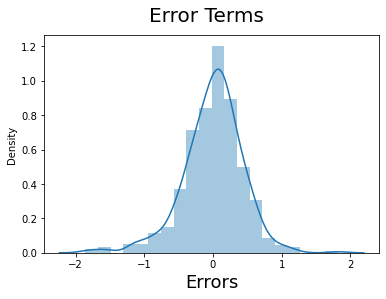

In [697]:
# Check with Model 5: (Top 7 features)
y_train_pred = lm4.predict(X_train_rfe4)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
# Plot heading
fig.suptitle('Error Terms', fontsize = 20)    
# Give the X-label
plt.xlabel('Errors', fontsize = 18)  

In [698]:
#########################################################################################################################

Text(0.5, 0, 'Errors')

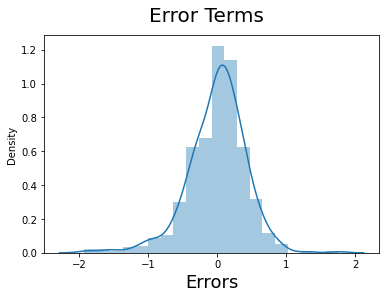

In [699]:
# Check with Model 4:(Top 9 features)
y_train_pred = lm3.predict(X_train_rfe3)

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
# Plot heading
fig.suptitle('Error Terms', fontsize = 20)    
# Give the X-label
plt.xlabel('Errors', fontsize = 18)  

In [700]:
###############################################################################################################

**Observation:**
 
 The error terms are fairly normally distributed in both Model 4 and Model 5 . Let's now make predictions on the test-set.

## 8.3 Looking for patterns in the residuals

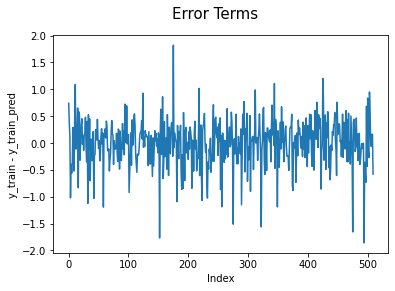

In [701]:
# Check with Model 5: (Top 7 features)
y_train_pred = lm4.predict(X_train_rfe4)
# Error Terms
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train - y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train - y_train_pred')
plt.show()

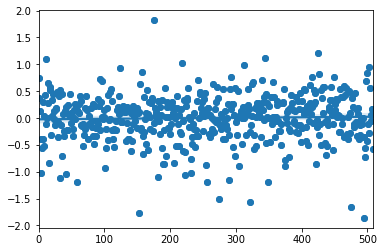

In [702]:
# Scatter plot to see the distribution of residuals
res = y_train - y_train_pred
plt.scatter(c,res)
sns.regplot(x= c, y= res)
plt.show()

We are confident that the model fit is not by chance, and has decent predictive power. The normality of residual terms allows some inference on the coefficients. The error terms are independent of each other.

In [703]:
###############################################################################################################

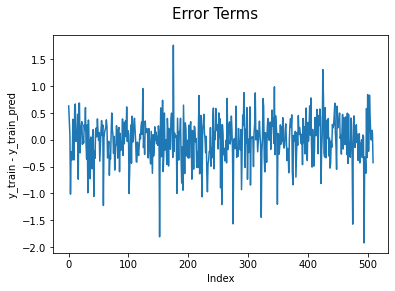

In [704]:
# Check with Model 4: (Top 9 features)
y_train_pred = lm3.predict(X_train_rfe3)
# Error Terms
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train - y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train - y_train_pred')
plt.show()

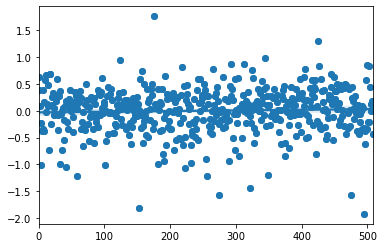

In [705]:
# Scatter plot to see the distribution of residuals
res = y_train - y_train_pred
plt.scatter(c,res)
sns.regplot(x= c, y= res)
plt.show()

In [706]:
###########################################################################################################

## 9. Prediction on the test dataset

### 9.1 Scale the test dataset 

In [707]:
# Check the continuous variables
con_var

['temp', 'hum', 'windspeed', 'cnt']

In [708]:
# We used standardization for scaling the training dataset use the same for testing dataset

# Apply scaler to all the continuous independent variables (temp,hum,windspeed) 
# Don't apply for dummy variables and binary categorical variables

#data_test[con_var] = scaler.fit_transform(data_test[con_var])
data_test[con_var] = scaler.transform(data_test[con_var])

In [709]:
data_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
184,0,1,0,1.305371,0.047995,-1.394498,0.798166,0,0,0,...,0,0,0,0,0,0,0,0,0,1
535,1,0,1,1.613721,-0.276087,-0.984730,0.884309,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,0,-0.112129,1.285378,0.079219,-0.937002,0,0,1,...,0,0,1,0,0,1,0,0,0,0
221,0,0,1,1.526280,-1.463381,0.110839,0.150554,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,1.240938,-2.305983,1.277165,0.246953,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [710]:
data_test.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter',
       'weathersit_light_snow', 'weathersit_mist', 'mnth_Aug', 'mnth_Dec',
       'mnth_Feb', 'mnth_Jan', 'mnth_July', 'mnth_June', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday'],
      dtype='object')

In [711]:
# Split the test data into independent and dependent variable

In [712]:
# Split the 'data_test' set into X and y after scaling
y_test = data_test.pop('cnt')
X_test = data_test

In [713]:
X_test.head()


,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,weathersit_light_snow,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
184,0,1,0,1.305371,0.047995,-1.394498,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
535,1,0,1,1.613721,-0.276087,-0.984730,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,0,-0.112129,1.285378,0.079219,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
221,0,0,1,1.526280,-1.463381,0.110839,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,1.240938,-2.305983,1.277165,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


## 9.2 Prediction with Model5 (Top 7 variables)

In [714]:
# Let's check the list of columns which has the 7 variables RFE had selected
X_train_rfe4.columns

Index(['const', 'yr', 'holiday', 'temp', 'season_spring',
       'weathersit_light_snow', 'weathersit_mist', 'mnth_July'],
      dtype='object')

In [715]:
feature_col4 = X_train_rfe4.columns[1:]

In [716]:
feature_col4

Index(['yr', 'holiday', 'temp', 'season_spring', 'weathersit_light_snow',
       'weathersit_mist', 'mnth_July'],
      dtype='object')

In [717]:
# Let's subset these columns and create a new dataframe 'X_test_rfe4'
X_test_rfe4 = X_test[feature_col4]

In [718]:
# Add a constant to the test set created
X_test_rfe4 = sm.add_constant(X_test_rfe4)
X_test_rfe4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   const                  219 non-null    float64
 1   yr                     219 non-null    int64  
 2   holiday                219 non-null    int64  
 3   temp                   219 non-null    float64
 4   season_spring          219 non-null    uint8  
 5   weathersit_light_snow  219 non-null    uint8  
 6   weathersit_mist        219 non-null    uint8  
 7   mnth_July              219 non-null    uint8  
dtypes: float64(2), int64(2), uint8(4)
memory usage: 9.4 KB


## 9.3 Model5 Evaluation

In [719]:
# Making predictions
y_test_pred = lm4.predict(X_test_rfe4)

Text(0, 0.5, 'y_test_pred')

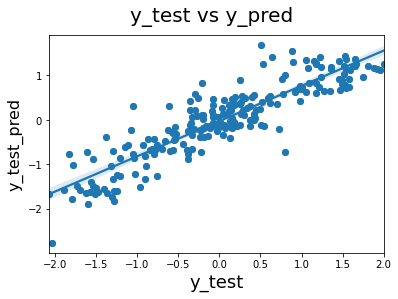

In [720]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
sns.regplot(x= y_test, y=y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)  

Text(0.5, 0.98, 'Actual and Predicted')

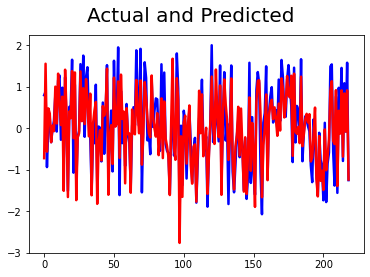

In [721]:
# Plotting actual y vs predicted y to significance of the model
c = [i for i in range(0,len(X_test),1)] # generating index
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-") # Actual target variable
plt.plot(c,y_test_pred, color="red", linewidth=2.5, linestyle="-") # Predicted target variable
fig.suptitle('Actual and Predicted', fontsize=20) 

**Observation:**

From the above plot, it is evident that the model is doing well on the test set as well. We can observe that variance of the residuals (error terms) is constant across predictions. i.e error term does not vary much as the value of the predictor variable changes.

Let us also check the R-squared and the adjusted R-squared value for the test set.

In [722]:
# r2_score for 7 variables
from sklearn.metrics import r2_score
round(r2_score(y_test, y_test_pred),2)

0.8

In [723]:
# Create variables required to get Adjusted r-square value
r2 = r2_score(y_test, y_test_pred)
N = len(y_test)
p = len(feature_col4)

In [724]:
# Adjusted R square value for 9 variables model
Adju_r2_score = 1 - ((1 - r2) * (N-1)/(N - p - 1))
round(Adju_r2_score,2)

0.79

In [725]:
# Find the mean squared error Model 5
from sklearn.metrics import mean_squared_error
mean_squared_error(y_true = y_test,y_pred = y_test_pred)


0.18745083752976002

In [726]:
import math
# Find Root mean square value
res = (y_test_pred - y_test)
rmse = math.sqrt(res.apply(lambda x: x * x).sum() / len(y_test))
norm_rmse = rmse /(y_test_pred.max() - y_test_pred.min())# Normalized root mean square error

In [727]:
norm_rmse

0.09738491621260284

Observation : Low mean square value (0.187) and near to zero normalized root mean square value (0.097)is the best model

**Observation:**

Thus, for the model with 7 variables, the r-squared on training and test data is about 81% and 80% respectively. The adjusted r-squared on the train and test dataset is about is about 80.7% and 79%.

In [728]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test,y_test_pred)

0.8024350667382412

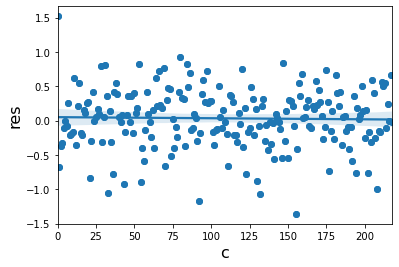

In [729]:
# Check the distribution of residuals of test dataset
c = [i for i in range(0,len(X_test),1)]
res = y_test - y_test_pred
plt.scatter(c,res)
sns.regplot(x= c, y= res)
plt.xlabel('c', fontsize = 16)  # X-label
plt.ylabel('res', fontsize = 16) 
plt.show()

**Insight**:

  * The r-squared on training and test data is about 81% and 80% respectively. The adjusted r-squared on the train and test dataset is about is about 80.7% and 79%. This is a good R-squared value, hence we can see our model is performing good even on unseen data (test data)
  * We can observe that variance of the residuals (error terms) is constant across predictions. i.e error term does not vary much as the value of the predictor variable changes.
  * The residuals are Normally distributed,having zero mean, constant variance and independent of each other. That indicates the Model is very good fit with the selected features in predicting unseen data.
    
    

## 9.4 Prediction with Model4 (Top 9 variables)

In [730]:
# Let's check the list of columns which has the 9 variables RFE had selected
X_train_rfe3.columns

Index(['const', 'yr', 'holiday', 'temp', 'season_spring', 'season_winter',
       'weathersit_light_snow', 'weathersit_mist', 'mnth_July', 'mnth_Sep'],
      dtype='object')

In [731]:
feature_col3 = X_train_rfe3.columns[1:]

In [732]:
feature_col3

Index(['yr', 'holiday', 'temp', 'season_spring', 'season_winter',
       'weathersit_light_snow', 'weathersit_mist', 'mnth_July', 'mnth_Sep'],
      dtype='object')

In [733]:
# Let's subset these columns and create a new dataframe 'X_test_rfe3'
X_test_rfe3 = X_test[feature_col3]

In [734]:
# Add a constant to the test set created
X_test_rfe3 = sm.add_constant(X_test_rfe3)
X_test_rfe3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   const                  219 non-null    float64
 1   yr                     219 non-null    int64  
 2   holiday                219 non-null    int64  
 3   temp                   219 non-null    float64
 4   season_spring          219 non-null    uint8  
 5   season_winter          219 non-null    uint8  
 6   weathersit_light_snow  219 non-null    uint8  
 7   weathersit_mist        219 non-null    uint8  
 8   mnth_July              219 non-null    uint8  
 9   mnth_Sep               219 non-null    uint8  
dtypes: float64(2), int64(2), uint8(6)
memory usage: 9.8 KB


## 9.5 Model4 Evaluation

In [735]:
# Making predictions
y_test_pred = lm3.predict(X_test_rfe3)

Text(0, 0.5, 'y_test_pred')

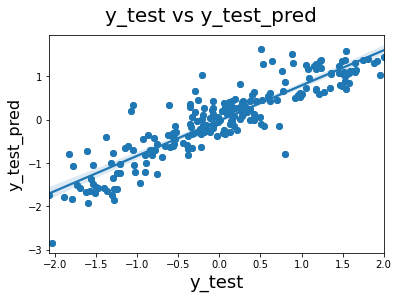

In [736]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
sns.regplot(x= y_test, y= y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)  

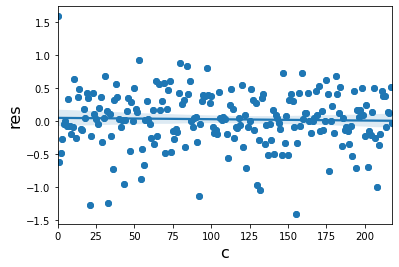

In [737]:
# Check the distribution of residuals of test dataset
c = [i for i in range(0,len(X_test),1)]
res = y_test - y_test_pred
plt.scatter(c,res)
sns.regplot(x= c, y= res)
plt.xlabel('c', fontsize = 16)  # X-label
plt.ylabel('res', fontsize = 16) 
plt.show()

Text(0.5, 0.98, 'Actual and Predicted')

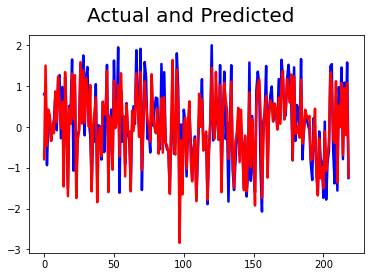

In [738]:
# Plotting actual y vs predicted y to significance of the model
c = [i for i in range(0,len(X_test),1)] # generating index
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-") # Actual target variable
plt.plot(c,y_test_pred, color="red", linewidth=2.5, linestyle="-") # Predicted target variable
fig.suptitle('Actual and Predicted', fontsize=20) 

**Observation:** 

   As we can see the error terms are randomly distributed and there is no pattern which means the output is explained well by the model and there are no other parameters that can explain the model better.

In [739]:
# r2_score for 9 variables
from sklearn.metrics import r2_score
round(r2_score(y_test, y_test_pred),3)

0.809

In [740]:
# Create variables required to get Adjusted r-square value
r2 = r2_score(y_test, y_test_pred)
N = len(y_test)
p = len(feature_col3)

In [741]:
# Adjusted R square value for 9 variables model
Adju_r2_score = 1 - ((1 - r2) * (N-1)/(N - p - 1))

In [742]:
# Display Adjusted R square value of 9 variables model
round(Adju_r2_score,3)

0.801

In [743]:
# Find the mean squared error for model 4
from sklearn.metrics import mean_squared_error
mean_squared_error(y_true = y_test,y_pred = y_test_pred)


0.1799904684087199

In [744]:
# Find the mean squared error Model 5
from sklearn.metrics import mean_squared_error
mean_squared_error(y_true = y_test,y_pred = y_test_pred)

0.1799904684087199

In [745]:
import math
# Find Root mean square value
res = (y_test_pred - y_test)
rmse = math.sqrt(res.apply(lambda x: x * x).sum() / len(y_test))
norm_rmse = rmse /(y_test_pred.max() - y_test_pred.min()) # Normalized root mean square error

In [746]:
norm_rmse

0.09461933650679161

Observation : Low mean square value (0.179) and near to zero normalized root mean square value (0.0946)is the best model

In [747]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.5
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          2.16e-181
Time:                        18:53:12   Log-Likelihood:                -282.79
No. Observations:                 510   AIC:                             585.6
Df Residuals:                     500   BIC:                             627.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.2970      0.043     -6.985      0.000      -0.381      -0.213
yr                        1.0386      0.038     27.300      0.000       0.964       1.113
holiday                  -0.4506      0.120     -3.740      0.000      -0.687      -0.214
temp                      0.4738      0.031     15.063      0.000       0.412       0.536
season_spring            -0.4934      0.070     -7.051      0.000      -0.631      -0.356
season_winter             0.2486      0.057      4.393      0.000       0.137       0.360
weathersit_light_snow    -1.3382      0.114    -11.768      0.000      -1.562      -1.115
weathersit_mist          -0.3546      0.041     -8.752      0.000      -0.434      -0.275
mnth_July                -0.3065      0.080     -3.824      0.000      -0.464      -0.149
mnth_Sep                  0.2932      0.073      4.042      0.000       0.151       0.436
==============================================================================
Omnibus:                       66.905   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              173.340
Skew:                          -0.661   Prob(JB):                     2.29e-38
Kurtosis:                       5.532   Cond. No.                         8.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [748]:
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     305.7
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          1.72e-176
Time:                        18:53:12   Log-Likelihood:                -300.20
No. Observations:                 510   AIC:                             616.4
Df Residuals:                     502   BIC:                             650.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1669      0.036     -4.654      0.000      -0.237      -0.096
yr                        1.0412      0.039     26.524      0.000       0.964       1.118
holiday                  -0.3898      0.124     -3.144      0.002      -0.633      -0.146
temp                      0.4236      0.027     15.671      0.000       0.371       0.477
season_spring            -0.6835      0.058    -11.832      0.000      -0.797      -0.570
weathersit_light_snow    -1.2783      0.117    -10.930      0.000      -1.508      -1.049
weathersit_mist          -0.3495      0.042     -8.369      0.000      -0.432      -0.267
mnth_July                -0.3681      0.081     -4.525      0.000      -0.528      -0.208
==============================================================================
Omnibus:                       55.460   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.253
Skew:                          -0.577   Prob(JB):                     3.15e-29
Kurtosis:                       5.201   Cond. No.                         7.92
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Insights:**

   * Adjusted R-square value of trained data set and Tested dataset for the Model-4 ( Top 9 feature variables) is 81.9% and 79.3% respectively.
   * Adjusted R-square value of trained data and Tested dataset for the Model-5 (Top 7 feature variables) is 80.7% and 79% respectively.
   * Normalized Root mean square value of Model 5 (top 7 features) = (0.097)
   * Normalized Root mean square value  Model 4 (top 9 features) = (0.0946)
   * Looks like the Model 5 (Top 7 features) and Model 4 both are predicting the target variable almost same. That means the top 7 features are enough us to predict the target variable.

**Conclusion:**
    
   * We can consider **Model 5(Top 7 feature variables) as our final Model.
   * yr , temp, holiday,season_spring, weathersit_light_snow, weathersit_mist, mnth_July are the predictors of the final Linear Regression Model
   * p-value of all the predictors zero except holiday which is 0.002 less than 0.05 indicates all predictors are significant.
   * VIF values of all the predictors are less than 5 indicates ,there is no multicollinearity issue,there is no redundant features in the final Model 
   * Probability of F-statistics is almost equal to zero,indicates that **Model is good fit with the features**, that means all the predictors(independent features) in the model are significant in explaining the variance of dependent variable
   * The co-efficients of the predictors indicates that, how the predictors affects the target variable.

In [749]:
feature_col4

Index(['yr', 'holiday', 'temp', 'season_spring', 'weathersit_light_snow',
       'weathersit_mist', 'mnth_July'],
      dtype='object')

In [750]:
feature_col4.insert(len(feature_col4),'cnt')

Index(['yr', 'holiday', 'temp', 'season_spring', 'weathersit_light_snow',
       'weathersit_mist', 'mnth_July', 'cnt'],
      dtype='object')

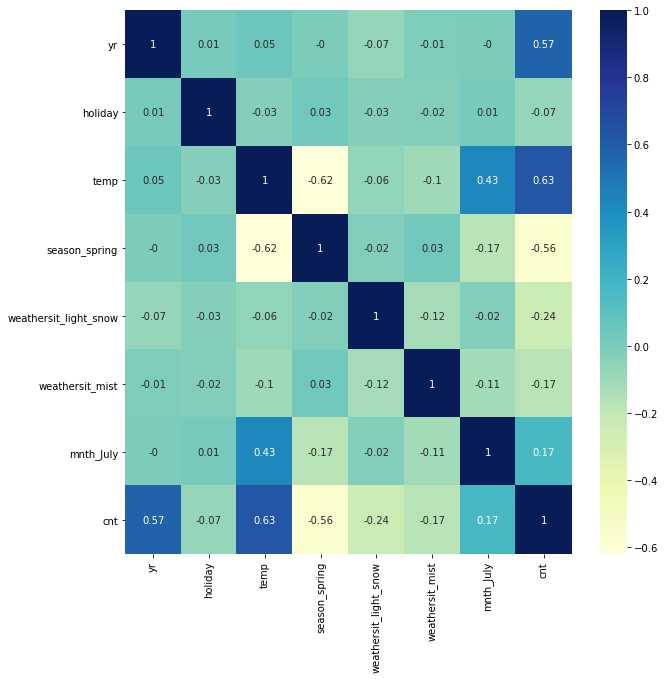

In [751]:
# Check the correlation of final predictors and target variable
corr_matrix = data[feature_col4.insert(len(feature_col4),'cnt')].corr().apply(lambda x: round(x,2))
plt.figure(figsize = (10,10))
sns.heatmap(corr_matrix,annot = True, cmap="YlGnBu")
plt.show()

**Statistical Insights of the Final Model:**

   * **Adjusted R-square value** of trained data set and Tested dataset for the Model-5 ( Top 7 feature variables) is 80.7% and 79%
   
   * This is a good R-squared value, hence we can see our model is performing good even on unseen data (test data)
   
   * yr , temp, holiday,season_spring, weathersit_light_snow,weathersit_mist ,mnth_July are the predictors of the final Linear Regression Model
   
   * **p-value** of all the predictors are zero indicates all predictors are significant.
   
   * **VIF values** of all the predictors are less than 5 indicates ,there is no multicollinearity issue,there is no redundant features in the final Model 
   
   * **Probability of F-statistics** is almost equal to zero,indicates that **Model is good fit with the features**, that means all the predictors(independent features) in the model are significant in explaining the variance of dependent variable
   
   * The **co-efficients of the predictors** indicates that, how the predictors affects the target variable.

**Business Insights:**

1. There is a high demand for the shared bikes in comming years. After corona lockdown, when the conditions become normal the 'Boom-Bikes' will get very good profit in shared bike business.

2. When there a misty weather and light-snow the most of the people are not coming out.So there is a less demand for shared bikes.

3. The demand for shared bike is reducing in spring season.The Boom bike company can give some **spring season offers** to increase the demand in this season. Expand the business in Spring season.

4. Whenever holiday is there the demand for shared bike is reducing. So the Company can give some **holiday offers** or promotions to increase the demand.

5.  The demand for shared bikes are more when the weather is clear,temp is high and there is least demand when there is snow fall.

6. In holiday the demand for shared bike is reduces.

7. December and January is the beginning of Spring and still winter effect will be there, snow fall will be there. Therefore the demand for shared bikes is less. From Feb onwards again it pickups.

8. July has pleasant weather, but still there is a small dip of demand for shared bikes, again in September it reaches maximum.

9. We can give some focus for the unknown reason for the small dip of demand in July.

10. Winter season starts from September to December, There fore after September the demand for shared bikes dips till January.

11. There would be less bookings during Light Snow or Rain, they could probably use this time to serive the bikes without having business impact.

## 10. Conclusion:

When the situation comes back to normal, the company should come up with new offers during spring season, advertise a little when the weather is pleasant , on July month and holidays.

Significant variables to predict the demand for shared bikes:

* holiday (Little Focus needed to improve the business in **holidays** )
* temp (When there is pleasant weather and temerature the demand for shared bikes will increases)
* Season (More focus needed for **Spring season**)
* months (Little focus needed to avoid the small dip in **July month**)
* Year (After Covid-19 lockdowns and quarantines, when the situation comes normal definitely the demand for shared bikes will increases) 
* weathersit (If the weather situation is **mist and light snowfall**, the company can focus on bike services)